# This Notebook contains the different Tried out models and its performance:

**SET 1 Dataset : All features**
- 1.1 Random Model
- 1.2 KNN 
- 1.3 Logistic Regression
- 1.4 SVM
- 1.5 Random Forest
- 1.6 LGBM
- Comparison of the metrics for each model/algorithm


**SET 2 Dataset : All features + 10 Autoencoder components**


- 2.3 Logistic Regression
- 2.6 LGBM
- Comparison of the metrics for each model/algorithm

**SET 3 Dataset : All features + 5 pca components**


- 3.3 Logistic Regression
- 3.6 LGBM
- Comparison of the metrics for each model/algorithm

**SET 4 Dataset : selected features**


**SET 5 Dataset : selected features + 5 pca components**


**SET 6 Dataset : All features + 10 AE components**


**FINAL SUMMARY**
- Comparison of the metrics for each model/algorithm

# Required Libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer

In [ ]:
from google.colab import files
files.upload()

In [5]:
!unzip Drug_Marketing1.zip -d Drug_Marketing1

Archive:  Drug_Marketing1.zip
  inflating: Drug_Marketing1/Drug_Marketing1/all_data_new.csv  


In [6]:
os.chdir('/content/Drug_Marketing1/Drug_Marketing1')
cwd=os.getcwd()
print("cwd:",cwd)

cwd: /content/Drug_Marketing1/Drug_Marketing1


In [ ]:
all_data_new=pd.read_csv('/content/Drug_Marketing1/Drug_Marketing1/all_data_new.csv')
#print (all_data_new.head())

In [ ]:
all_data_new.head(5)

,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,physician_segment_ordinal
0,201903-Q3,1,9,39,0,0,1,0,0,1,46,20,28,28,76,28,2,0,1,1,1,1,165,42,0.91,0.89,M,58,83,nephrology,3
1,201904-Q4,1,4,12,0,0,0,0,0,1,43,18,32,22,72,36,1,1,1,1,1,1,169,45,0.91,0.89,M,58,83,nephrology,3
2,202001-Q1,1,14,26,0,0,1,0,0,1,53,17,37,33,80,33,4,1,0,0,1,1,198,49,0.91,0.89,M,58,83,nephrology,3
3,202002-Q2,1,18,20,0,0,1,0,0,1,45,19,38,38,67,28,7,1,0,0,1,1,170,46,0.91,0.89,M,58,83,nephrology,3
4,202003-Q3,1,5,96,0,0,0,0,0,1,48,25,40,35,75,31,7,1,0,0,0,1,169,0,0.91,0.89,M,58,83,nephrology,2


# TRAIN TEST SPLIT

In [ ]:
CLASS_LABEL ='physician_segment_ordinal'

In [ ]:
print(f'\nTotal Dataset contains {all_data_new.shape[0]} samples and {all_data_new.shape[1]} variables')
features = [c for c in all_data_new.columns if c not in [CLASS_LABEL]]
print(f'\nThe dataset contains {len(features)} features and 1 CLASS LABEL')


Total Dataset contains 48703 samples and 31 variables

The dataset contains 30 features and 1 CLASS LABEL


In [ ]:
category_cols= ['physician_gender', 'physician_speciality', 'year_quarter']

In [ ]:
numerical_cols = [c for c in features if c not in category_cols]
#numerical_cols.remove('physician_id')
numerical_cols

['brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'saving_cards_dropped',
 'vouchers_dropped',
 'total_seminar_as_attendee',
 'total_seminar_as_speaker',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_prescriptions_for_indication3',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'brand_web_impressions',
 'brand_ehr_impressions',
 'brand_enews_impressions',
 'brand_mobile_impressions',
 'brand_organic_web_visits',
 'brand_paidsearch_visits',
 'total_competitor_prescription',
 'new_prescriptions',
 'urban_population_perc_in_physician_locality',
 'percent_population_with_health_insurance_in_last10q',
 'physician_tenure',
 'physician_age']

In [ ]:
all_data_new = pd.get_dummies(all_data_new, columns = category_cols)

In [ ]:
y_class = all_data_new[CLASS_LABEL]
CLASS_LABEL ='physician_segment_ordinal'
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(all_data_new.drop(['physician_segment_ordinal'], axis=1), y_class,stratify=y_class,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
features = numerical_cols
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
X_train[features] = autoscaler.fit_transform(X_train[features])

In [ ]:
X_cv[features] = autoscaler.transform(X_cv[features])
X_test[features] = autoscaler.transform(X_test[features])

In [ ]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 31169
Number of data points in test data: 9741
Number of data points in cross validation data: 7793


Text(0.5, 0, 'Class')

Text(0, 0.5, 'Data points per Class')

Text(0.5, 1.0, 'Distribution of yi in train data')

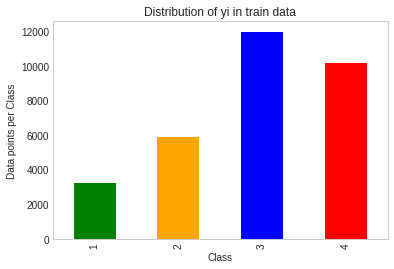

Number of data points in class 3 : 11969 ( 38.4 %)
Number of data points in class 4 : 10132 ( 32.507 %)
Number of data points in class 2 : 5865 ( 18.817 %)
Number of data points in class 1 : 3203 ( 10.276 %)
--------------------------------------------------------------------------------


Text(0.5, 0, 'Class')

Text(0, 0.5, 'Data points per Class')

Text(0.5, 1.0, 'Distribution of yi in test data')

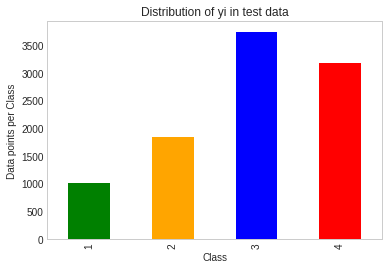

Number of data points in class 3 : 3741 ( 38.405 %)
Number of data points in class 4 : 3166 ( 32.502 %)
Number of data points in class 2 : 1833 ( 18.817 %)
Number of data points in class 1 : 1001 ( 10.276 %)
--------------------------------------------------------------------------------


Text(0.5, 0, 'Class')

Text(0, 0.5, 'Data points per Class')

Text(0.5, 1.0, 'Distribution of yi in cross validation data')

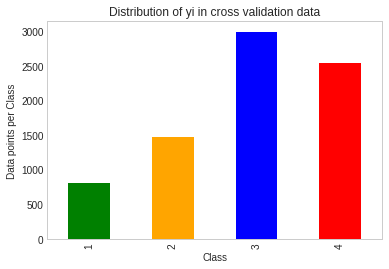

Number of data points in class 3 : 2992 ( 38.393 %)
Number of data points in class 4 : 2533 ( 32.504 %)
Number of data points in class 2 : 1467 ( 18.825 %)
Number of data points in class 1 : 801 ( 10.278 %)


In [ ]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar',color=['green', 'orange', 'blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar',color=['green', 'orange', 'blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar',color=['green', 'orange', 'blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [ ]:
# Reference : Applied AI Course:

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

# Machine Learning Models

- 1.1 Random Model

Log loss on Cross Validation Data using Random Model 1.6748714542357996
Log loss on Test Data using Random Model 1.6549627613960103
Number of misclassified points  75.62878554563186
-------------------------------------------------- Confusion matrix --------------------------------------------------


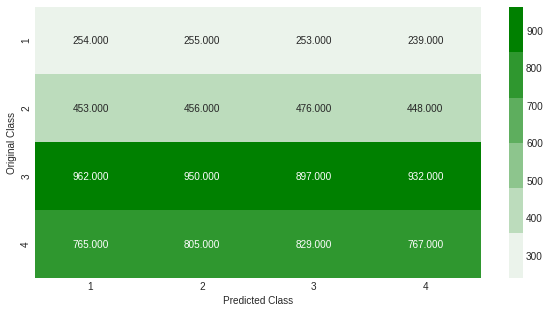

-------------------------------------------------- Precision matrix --------------------------------------------------


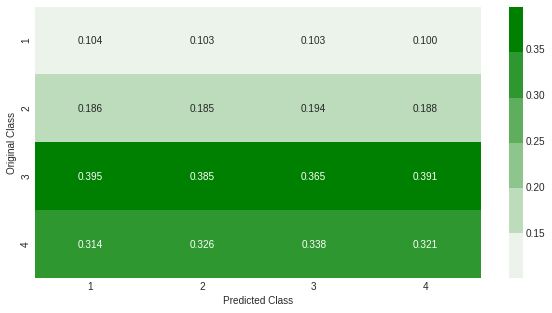

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


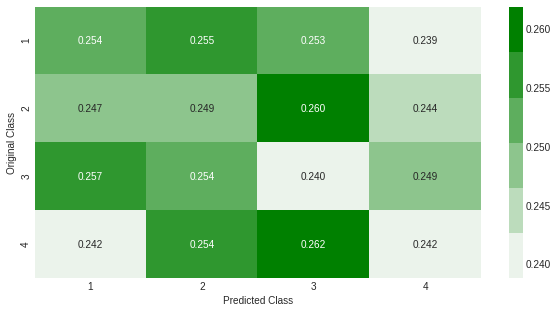

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# ref: applied ai course
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,4))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,4)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,4))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,4)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

# - 1.2 KNN Model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=1, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=3, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=5, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=7, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=9, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=11, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=13, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

log_loss for k =  1 is 1.2243965868975943
log_loss for k =  3 is 1.189718113408328
log_loss for k =  5 is 1.1792287372183063
log_loss for k =  7 is 1.1708300340293099
log_loss for k =  9 is 1.164873917977692
log_loss for k =  11 is 1.1604000544675503
log_loss for k =  13 is 1.1579376858980055


Text(1, 1.2243965868975943, '(1, 1.224)')

Text(3, 1.189718113408328, '(3, 1.19)')

Text(5, 1.1792287372183063, '(5, 1.179)')

Text(7, 1.1708300340293099, '(7, 1.171)')

Text(9, 1.164873917977692, '(9, 1.165)')

Text(11, 1.1604000544675503, '(11, 1.16)')

Text(13, 1.1579376858980055, '(13, 1.158)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

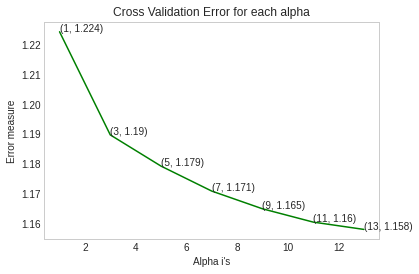

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

CalibratedClassifierCV(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                           leaf_size=30,
                                                           metric='minkowski',
                                                           metric_params=None,
                                                           n_jobs=None,
                                                           n_neighbors=13, p=2,
                                                           weights='uniform'),
                       cv=None, method='sigmoid')

For values of best alpha =  13 The train log loss is: 1.0775828206989333
For values of best alpha =  13 The cross validation log loss is: 1.1579376858980055
For values of best alpha =  13 The test log loss is: 1.157680562559072
Number of misclassified points  50.39523662868288
-------------------------------------------------- Confusion matrix --------------------------------------------------


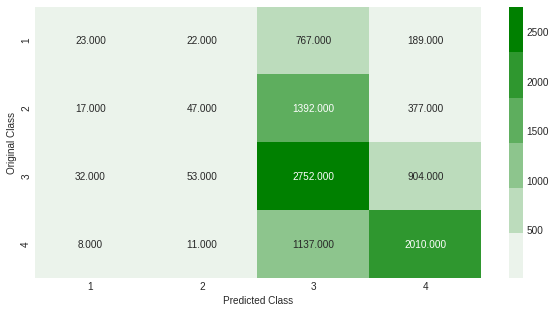

-------------------------------------------------- Precision matrix --------------------------------------------------


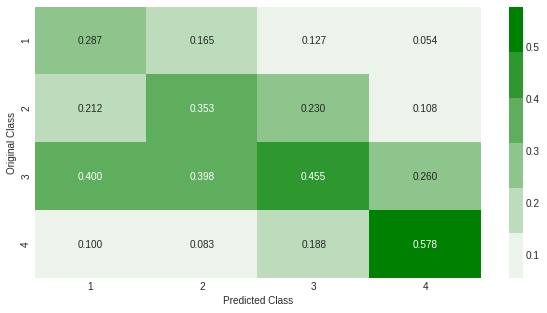

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


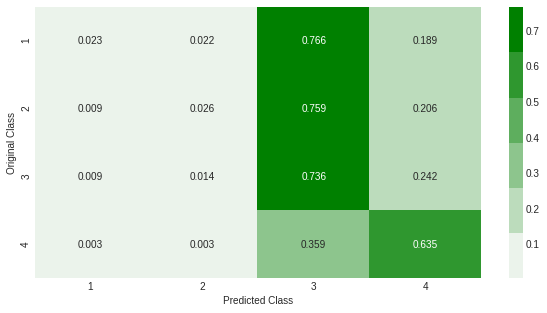

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/

  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# - 1.3 Logistic Regression

SGDClassifier(alpha=1e-05, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                    

SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                     

SGDClassifier(alpha=1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                       

SGDClassifier(alpha=10, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=10, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                      

SGDClassifier(alpha=100, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=100, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                     

SGDClassifier(alpha=1000, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1000, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                    

log_loss for c =  1e-05 is 1.017508259469732
log_loss for c =  0.0001 is 1.0198743552593226
log_loss for c =  0.001 is 1.06077002840342
log_loss for c =  0.01 is 1.1710324629744222
log_loss for c =  0.1 is 1.2187722170380824
log_loss for c =  1 is 1.2345607286829743
log_loss for c =  10 is 1.263267584585808
log_loss for c =  100 is 1.264142415289844
log_loss for c =  1000 is 1.263914034696893


Text(1e-05, 1.017508259469732, '(1e-05, 1.018)')

Text(0.0001, 1.0198743552593226, '(0.0001, 1.02)')

Text(0.001, 1.06077002840342, '(0.001, 1.061)')

Text(0.01, 1.1710324629744222, '(0.01, 1.171)')

Text(0.1, 1.2187722170380824, '(0.1, 1.219)')

Text(1, 1.2345607286829743, '(1, 1.235)')

Text(10, 1.263267584585808, '(10, 1.263)')

Text(100, 1.264142415289844, '(100, 1.264)')

Text(1000, 1.263914034696893, '(1000, 1.264)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

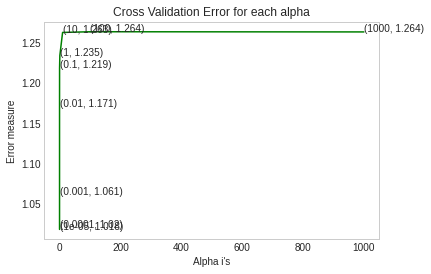

SGDClassifier(alpha=1e-05, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

log loss for train data 1.0141873008364755
log loss for cv data 1.017950225923977
log loss for test data 1.0157987811958922
Number of misclassified points  42.357047531054306
-------------------------------------------------- Confusion matrix --------------------------------------------------


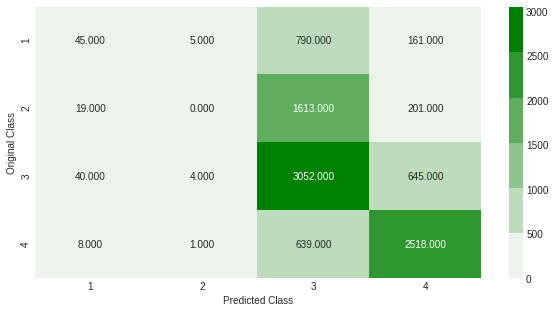

-------------------------------------------------- Precision matrix --------------------------------------------------


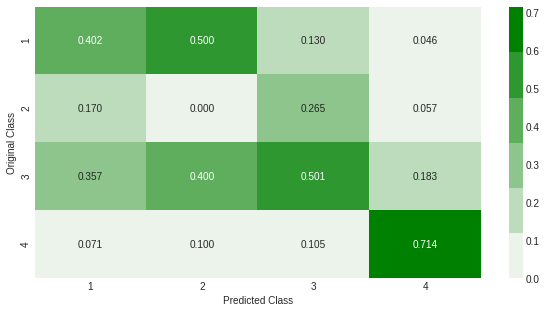

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


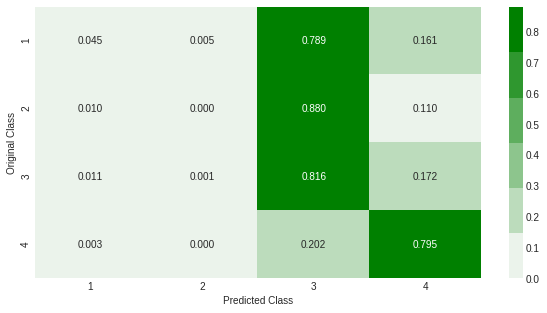

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# Reference Applied AI Course
alpha_param = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha_param:
    svm=SGDClassifier(penalty='l2',alpha=i,class_weight='balanced',loss='log')
    svm.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(svm, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=svm.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha_param[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha_param, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha_param[i],np.round(txt,3)), (alpha_param[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

svm=SGDClassifier(penalty='l2',alpha=alpha_param[best_alpha],class_weight='balanced',loss='log')
svm.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(svm, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=svm.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# - 1.4 SVM

SGDClassifier(alpha=1e-05, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                 

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                 

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

SGDClassifier(alpha=1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                     

SGDClassifier(alpha=10, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=10, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                    

SGDClassifier(alpha=100, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=100, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

SGDClassifier(alpha=1000, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1000, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

log_loss for c =  1e-05 is 1.0253103668444066
log_loss for c =  0.0001 is 1.0271339459259452
log_loss for c =  0.001 is 1.0299029813853058
log_loss for c =  0.01 is 1.0356454049748307
log_loss for c =  0.1 is 1.0382802363538195
log_loss for c =  1 is 1.104807979711142
log_loss for c =  10 is 1.267179572083683
log_loss for c =  100 is 1.2641052003081108
log_loss for c =  1000 is 1.264105224486458


Text(1e-05, 1.0253103668444066, '(1e-05, 1.025)')

Text(0.0001, 1.0271339459259452, '(0.0001, 1.027)')

Text(0.001, 1.0299029813853058, '(0.001, 1.03)')

Text(0.01, 1.0356454049748307, '(0.01, 1.036)')

Text(0.1, 1.0382802363538195, '(0.1, 1.038)')

Text(1, 1.104807979711142, '(1, 1.105)')

Text(10, 1.267179572083683, '(10, 1.267)')

Text(100, 1.2641052003081108, '(100, 1.264)')

Text(1000, 1.264105224486458, '(1000, 1.264)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

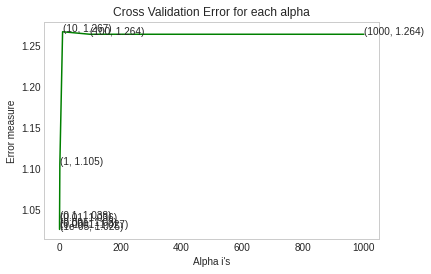

SGDClassifier(alpha=1e-05, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                 

log loss for train data 1.0205023596048748
log loss for cv data 1.0230385509978352
log loss for test data 1.0230865955102346
Number of misclassified points  41.83348732163022
-------------------------------------------------- Confusion matrix --------------------------------------------------


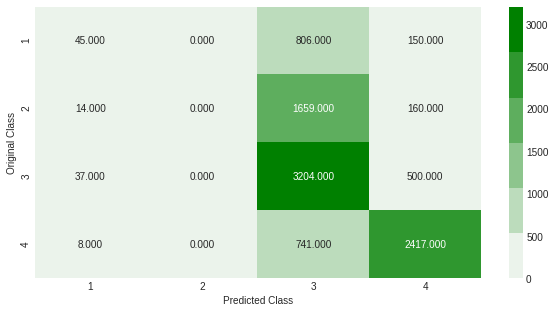

-------------------------------------------------- Precision matrix --------------------------------------------------


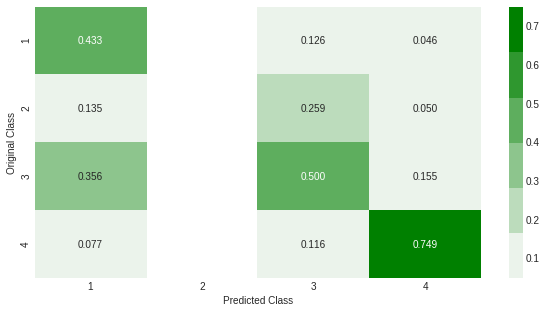

Sum of columns in precision matrix [ 1. nan  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


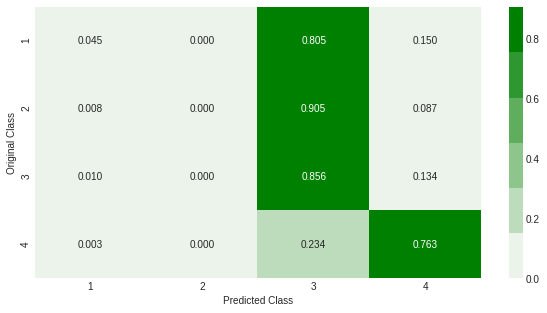

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# Reference Applied AI Course
alpha_param = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha_param:
    svm=SGDClassifier(penalty='l2',alpha=i,class_weight='balanced',loss='hinge')
    svm.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(svm, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=svm.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha_param[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha_param, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha_param[i],np.round(txt,3)), (alpha_param[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

svm=SGDClassifier(penalty='l2',alpha=alpha_param[best_alpha],class_weight='balanced',loss='hinge')
svm.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(svm, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=svm.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

# Performance Metrics Table so far

In [36]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model", "Eval Metric","Train Loss","CV Loss","Test Loss","% Misclassified"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["Basic",  "Random","LOG LOSS",'',1.67,1.65,75.3])
x.add_row(["Basic",  "KNN","LOG LOSS",1.07,1.15,1.15,50.3])
x.add_row(["Basic",  "SGD-LR","LOG LOSS",1.01,1.01,1.01,42.1])
x.add_row(["Basic",  "SGD-SVM","LOG LOSS",1.02,1.02,1.02,41.1])
x.add_row(["-------------------------",  "------------------","----","----","----","----","----"])

print(x)

+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
|        Feature Set        |       Model        | Eval Metric | Train Loss | CV Loss | Test Loss | % Misclassified |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
|           Basic           |       Random       |   LOG LOSS  |            |   1.67  |    1.65   |       75.3      |
|           Basic           |        KNN         |   LOG LOSS  |    1.07    |   1.15  |    1.15   |       50.3      |
|           Basic           |       SGD-LR       |   LOG LOSS  |    1.01    |   1.01  |    1.01   |       42.1      |
|           Basic           |      SGD-SVM       |   LOG LOSS  |    1.02    |   1.02  |    1.02   |       41.1      |
| ------------------------- | ------------------ |     -


# - 1.5 Random Forest Classifier (with Log Loss)

In [ ]:
x_cfl=RandomForestClassifier()
prams={
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
     'min_samples_split': [2, 5, 10]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='neg_log_loss')
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.8min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'n_estimators': 2000, 'min_samples_split': 5, 'max_depth': 5}",-0.975612,4
1,"{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 3}",-1.014432,8
2,"{'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 5}",-0.976115,7
3,"{'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 3}",-1.015108,10
4,"{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 3}",-1.014575,9
5,"{'n_estimators': 2000, 'min_samples_split': 2, 'max_depth': 10}",-0.927286,1
6,"{'n_estimators': 1000, 'min_samples_split': 5, 'max_depth': 10}",-0.928159,2
7,"{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5}",-0.975682,5
8,"{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 5}",-0.975993,6
9,"{'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 10}",-0.929975,3


In [ ]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

-0.9272862944844587
{'n_estimators': 2000, 'min_samples_split': 2, 'max_depth': 10}


In [ ]:
x_cfl=RandomForestClassifier(n_estimators=2000,  max_depth=10,min_samples_split=2,n_jobs=-1)
# feval=lgb_f1_macro
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=10,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                 

For best values of hyper paramsbest alpha the train log loss is: 0.7992576350399814
For best values of hyper paramsbest alpha the cross validation log loss is: 0.9281899531370832
For best values of hyper paramsbest alpha the test log loss is: 0.9263694697706195
Number of misclassified points  37.634739759778256
-------------------------------------------------- Confusion matrix --------------------------------------------------


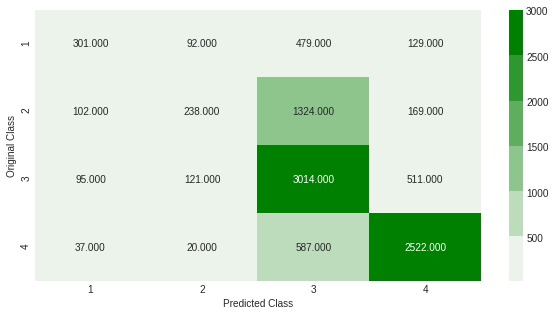

-------------------------------------------------- Precision matrix --------------------------------------------------


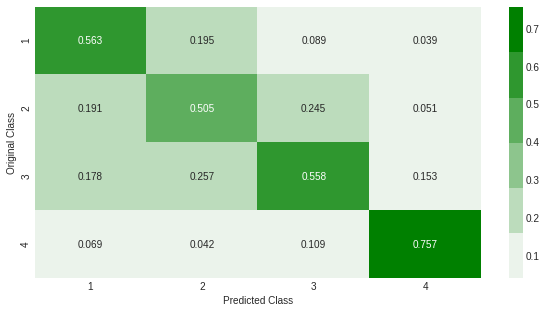

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


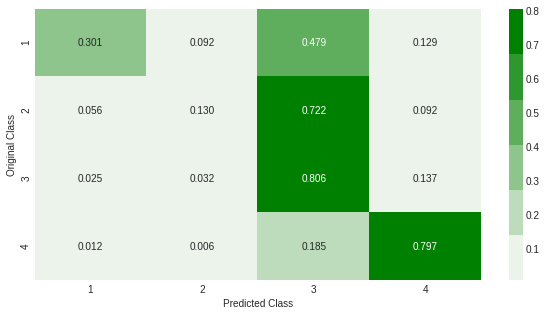

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:

predict_y = c_cfl.predict_proba(X_train)
print('For best values of hyper params the train log loss is:',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print('For best values of hyper params the cross validation log loss is:',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print('For best values of hyper params the test log loss is:',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

Feature Importance

<Figure size 720x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 25 artists>

([<matplotlib.axis.YTick at 0x7fbf645202d0>,
 [Text(0, 0, 'year_quarter_202001-Q1'),
  Text(0, 0, 'saving_cards_dropped'),
  Text(0, 0, 'physician_gender_M'),
  Text(0, 0, 'physician_gender_F'),
  Text(0, 0, 'physician_speciality_nephrology'),
  Text(0, 0, 'brand_enews_impressions'),
  Text(0, 0, 'brand_ehr_impressions'),
  Text(0, 0, 'brand_web_impressions'),
  Text(0, 0, 'brand_mobile_impressions'),
  Text(0, 0, 'urban_population_perc_in_physician_locality'),
  Text(0, 0, 'brand_prescribed'),
  Text(0, 0, 'total_sample_dropped'),
  Text(0, 0, 'physician_age'),
  Text(0, 0, 'percent_population_with_health_insurance_in_last10q'),
  Text(0, 0, 'physician_tenure'),
  Text(0, 0, 'total_patient_with_medicaid_insurance_plan'),
  Text(0, 0, 'year_quarter_202003-Q3'),
  Text(0, 0, 'total_representative_visits'),
  Text(0, 0, 'new_prescriptions'),
  Text(0, 0, 'total_patient_with_commercial_insurance_plan'),
  Text(0, 0, 'total_prescriptions_for_indication2'),
  Text(0, 0, 'total_patient_with_

Text(0.5, 0, 'Relative Importance')

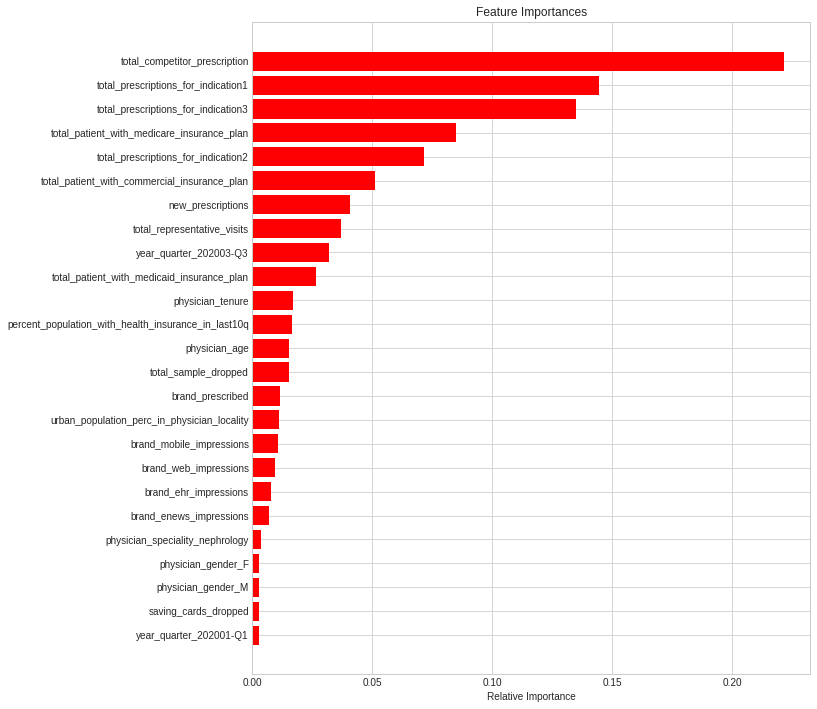

In [ ]:
features = X_train.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Random Forest Classifier (with f1-macro)

In [ ]:
x_cfl=RandomForestClassifier()
prams={
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
     'min_samples_split': [2, 5, 10]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='f1_macro')
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 10}",0.474296,5
1,"{'n_estimators': 2000, 'min_samples_split': 10, 'max_depth': 10}",0.474806,4
2,"{'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 3}",0.344066,9
3,"{'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10}",0.475655,2
4,"{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}",0.478243,1
5,"{'n_estimators': 1000, 'min_samples_split': 2, 'max_depth': 5}",0.436022,6
6,"{'n_estimators': 2000, 'min_samples_split': 2, 'max_depth': 10}",0.474943,3
7,"{'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 5}",0.434103,7
8,"{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 3}",0.344467,8
9,"{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 3}",0.344061,10


In [ ]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.47824286085297796
{'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10}


In [ ]:
x_cfl=RandomForestClassifier(n_estimators=100,  max_depth=10,min_samples_split=5,n_jobs=-1)
# feval=lgb_f1_macro
x_cfl.fit(X_train,y_train)
#c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
#c_cfl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

For best values of hyper params the train f1_score is: 0.5416058511032761
For best values of hyper params the cross validation f1_score is: 0.47163199570939635
For best values of hyper params the test f1_score is: 0.47361837448208427
Number of misclassified points  38.32255415255108
-------------------------------------------------- Confusion matrix --------------------------------------------------


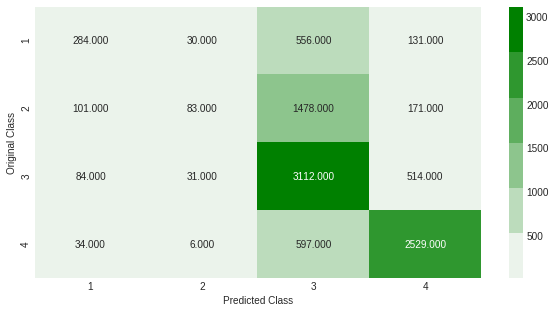

-------------------------------------------------- Precision matrix --------------------------------------------------


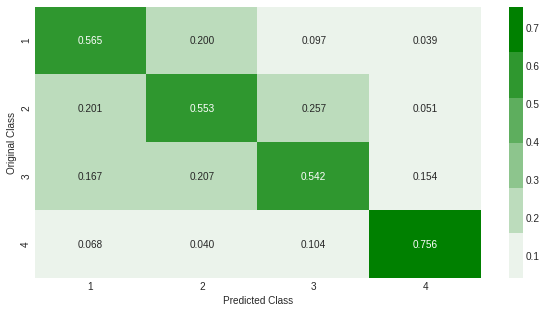

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


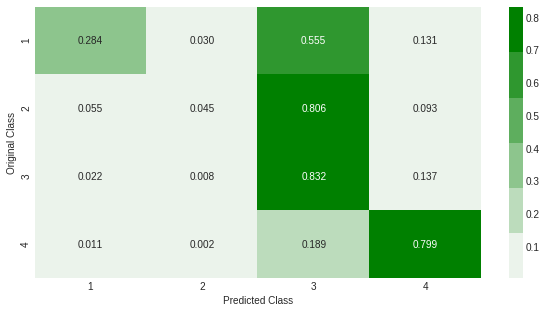

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:

predict_y = x_cfl.predict(X_train)
print('For best values of hyper params the train f1_score is:',f1_score(y_train, predict_y,average='macro'))
predict_y = x_cfl.predict(X_cv)
print('For best values of hyper params the cross validation f1_score is:',f1_score(y_cv, predict_y,average='macro'))
predict_y = x_cfl.predict(X_test)
print('For best values of hyper params the test f1_score is:',f1_score(y_test, predict_y,average='macro'))
plot_confusion_matrix(y_test, x_cfl.predict(X_test))

Random Forest Classifier (with f1-micro score)

In [ ]:
x_cfl=RandomForestClassifier()
prams={
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
     'min_samples_split': [2, 5, 10]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='f1_micro')
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'n_estimators': 1000, 'min_samples_split': 5, 'max_depth': 10}",0.614649,3
1,"{'n_estimators': 1000, 'min_samples_split': 10, 'max_depth': 10}",0.613815,5
2,"{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 10}",0.614361,4
3,"{'n_estimators': 1000, 'min_samples_split': 2, 'max_depth': 10}",0.614938,1
4,"{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 3}",0.576855,10
5,"{'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 5}",0.598415,6
6,"{'n_estimators': 1000, 'min_samples_split': 5, 'max_depth': 5}",0.598159,7
7,"{'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 3}",0.577369,9
8,"{'n_estimators': 1000, 'min_samples_split': 2, 'max_depth': 5}",0.597902,8
9,"{'n_estimators': 2000, 'min_samples_split': 10, 'max_depth': 10}",0.614746,2


In [ ]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.6149381357394776
{'n_estimators': 1000, 'min_samples_split': 2, 'max_depth': 10}


In [ ]:
x_cfl=RandomForestClassifier(n_estimators=1000,  max_depth=10,min_samples_split=2,n_jobs=-1)
# feval=lgb_f1_macro
x_cfl.fit(X_train,y_train)
#c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
#c_cfl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

For best values of hyper params the train f1_score is: 0.6668163880778979
For best values of hyper params the cross validation f1_score is: 0.6147824971127935
For best values of hyper params the test f1_score is: 0.6166717996098963
Number of misclassified points  38.332820039010365
-------------------------------------------------- Confusion matrix --------------------------------------------------


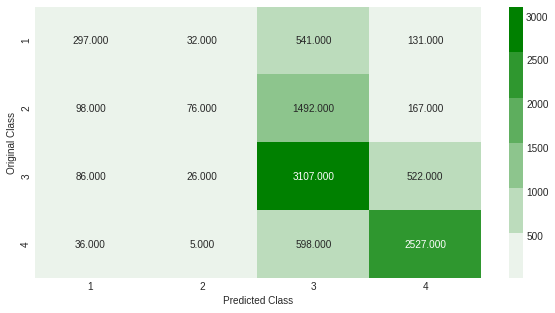

-------------------------------------------------- Precision matrix --------------------------------------------------


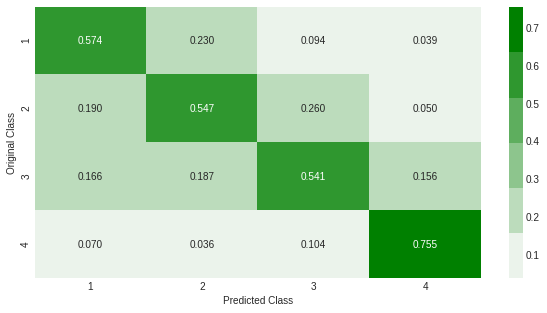

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


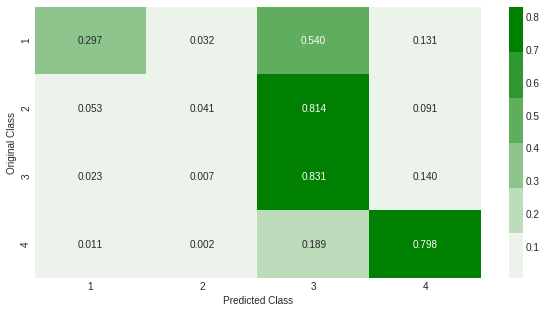

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:

predict_y = x_cfl.predict(X_train)
print('For best values of hyper params the train f1_score is:',f1_score(y_train, predict_y,average='micro'))
predict_y = x_cfl.predict(X_cv)
print('For best values of hyper params the cross validation f1_score is:',f1_score(y_cv, predict_y,average='micro'))
predict_y = x_cfl.predict(X_test)
print('For best values of hyper params the test f1_score is:',f1_score(y_test, predict_y,average='micro'))
plot_confusion_matrix(y_test, x_cfl.predict(X_test))

# - 1.6 LGBM Model with Hyper Parameterization (for log loss metric)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb

# Reference: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
#x_cfl=XGBClassifier()
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    'eval_metric':'multi_logloss'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.8min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [ ]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 1, 'objective': 'u', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.2, 'eval_metric': 'l', 'colsample_bytree': 1}",0.657256,5
1,"{'subsample': 1, 'objective': 'c', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.03, 'eval_metric': 't', 'colsample_bytree': 0.7}",0.611537,9
2,"{'subsample': 1, 'objective': 's', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.15, 'eval_metric': 's', 'colsample_bytree': 0.9}",0.681093,2
3,"{'subsample': 0.9, 'objective': 'u', 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'eval_metric': '_', 'colsample_bytree': 0.7}",0.641471,8
4,"{'subsample': 0.7, 'objective': 'c', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.05, 'eval_metric': 'g', 'colsample_bytree': 0.9}",0.648112,6
5,"{'subsample': 1, 'objective': 'i', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.05, 'eval_metric': 'l', 'colsample_bytree': 0.7}",0.646925,7
6,"{'subsample': 0.9, 'objective': 'm', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'eval_metric': 'g', 'colsample_bytree': 0.7}",0.593955,10
7,"{'subsample': 0.5, 'objective': 'i', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.2, 'eval_metric': 's', 'colsample_bytree': 1}",0.685008,1
8,"{'subsample': 0.5, 'objective': 't', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.15, 'eval_metric': 'l', 'colsample_bytree': 0.7}",0.670153,3
9,"{'subsample': 0.7, 'objective': 'i', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': '_', 'colsample_bytree': 0.9}",0.658731,4


In [ ]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.6850075104508839
{'subsample': 0.5, 'objective': 'i', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.2, 'eval_metric': 's', 'colsample_bytree': 1}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
               importance_type='split', learning_rate=0.2, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.5, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1,
                                                     importance_type='split',
                                                     learning_rate=0.2,
                                                     max_depth=10,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=2000,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                     


For values of best params train loss 0.3231365292718929

For values of best params cv loss 0.8112165308814144

For values of best params test loss 0.8141010401210744
Number of misclassified points  30.037983779899395
-------------------------------------------------- Confusion matrix --------------------------------------------------


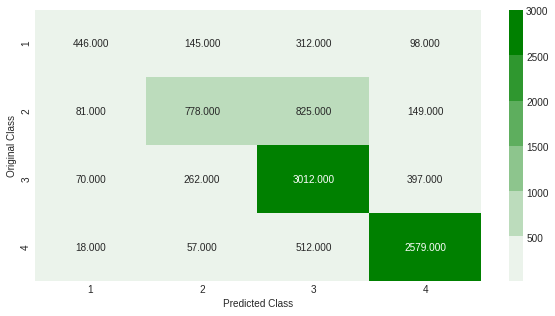

-------------------------------------------------- Precision matrix --------------------------------------------------


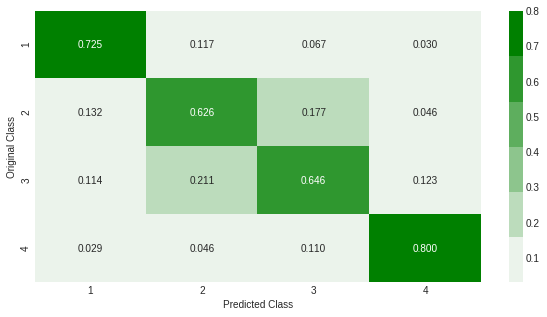

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


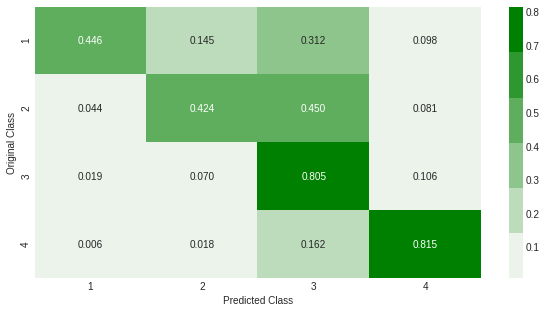

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
x_cfl=LGBMClassifier(n_estimators=2000, learning_rate=0.2, colsample_bytree=1, max_depth=10,subsample=0.5,nthread=-1
                    )
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('\nFor values of best params train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('\nFor values of best params cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('\nFor values of best params test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))


1.6 LGBM Model with Hyper Parameterization (for f1-macro metric)

In [ ]:
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='f1_macro')
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [ ]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 0.7, 'objective': 't', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.7}",0.529235,3
1,"{'subsample': 1, 'objective': 'u', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.9}",0.505175,5
2,"{'subsample': 1, 'objective': 'c', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 1}",0.455454,9
3,"{'subsample': 1, 'objective': 'i', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.9}",0.423966,10
4,"{'subsample': 0.9, 'objective': 's', 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.15, 'colsample_bytree': 1}",0.554045,1
5,"{'subsample': 0.7, 'objective': 't', 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1}",0.526406,4
6,"{'subsample': 1, 'objective': 'a', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}",0.462912,8
7,"{'subsample': 0.7, 'objective': 'u', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1}",0.469017,7
8,"{'subsample': 1, 'objective': 'i', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1}",0.534817,2
9,"{'subsample': 0.7, 'objective': 'a', 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.5}",0.469432,6


In [ ]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.5540449263057861
{'subsample': 0.9, 'objective': 's', 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.15, 'colsample_bytree': 1}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
               importance_type='split', learning_rate=0.15, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.9, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1,
                                                     importance_type='split',
                                                     learning_rate=0.15,
                                                     max_depth=3,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=2000,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                     


For values of best params train loss 0.7836613569409882

For values of best params cv loss 0.5709913243766747

For values of best params test loss 0.5565979762141879
Number of misclassified points  36.04352735858741
-------------------------------------------------- Confusion matrix --------------------------------------------------


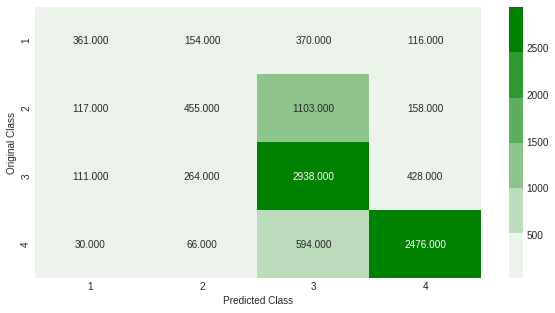

-------------------------------------------------- Precision matrix --------------------------------------------------


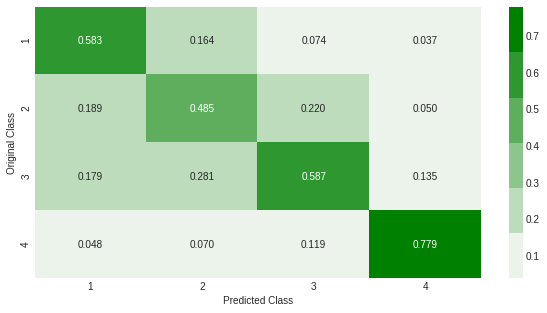

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


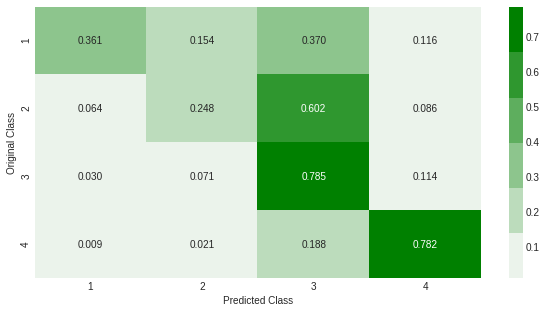

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
x_cfl=LGBMClassifier(n_estimators=2000, learning_rate=0.15, colsample_bytree=1, max_depth=3,subsample=0.9,nthread=-1
                    )

# feval=lgb_f1_macro
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict(X_train)
print ('\nFor values of best params train f1-macro',f1_score(y_train, predict_y,average='macro'))
predict_y = c_cfl.predict(X_cv)
print ('\nFor values of best params cv f1-macro',f1_score(y_cv, predict_y,average='macro'))
predict_y = c_cfl.predict(X_test)
print ('\nFor values of best params test f1-macro',f1_score(y_test, predict_y,average='macro'))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))


1.6 LGBM Model with Hyper Parameterization (for f1-micro metric)

In [ ]:
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='f1_micro')
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [ ]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 0.7, 'objective': 's', 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.7}",0.638583,3
1,"{'subsample': 1, 'objective': 's', 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.7}",0.617857,7
2,"{'subsample': 0.7, 'objective': 'a', 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.9}",0.644230,2
3,"{'subsample': 0.9, 'objective': 'u', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}",0.601431,10
4,"{'subsample': 0.5, 'objective': 's', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.7}",0.632872,4
5,"{'subsample': 1, 'objective': 'l', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}",0.624916,6
6,"{'subsample': 0.7, 'objective': 'm', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1}",0.614007,9
7,"{'subsample': 0.9, 'objective': 'a', 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.5}",0.628573,5
8,"{'subsample': 0.9, 'objective': 'l', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.9}",0.616734,8
9,"{'subsample': 0.7, 'objective': 'm', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1}",0.663736,1


In [ ]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.6637363992587911
{'subsample': 0.7, 'objective': 'm', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.7, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1,
                                                     importance_type='split',
                                                     learning_rate=0.1,
                                                     max_depth=10,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=1000,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                     


For values of best params train loss 0.9842792518207193

For values of best params cv loss 0.6835621711792634

For values of best params test loss 0.6776511651781131
Number of misclassified points  32.234883482188685
-------------------------------------------------- Confusion matrix --------------------------------------------------


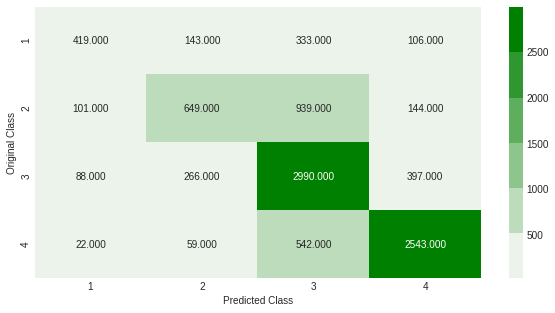

-------------------------------------------------- Precision matrix --------------------------------------------------


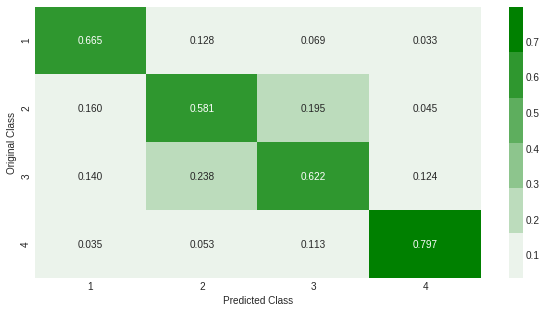

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


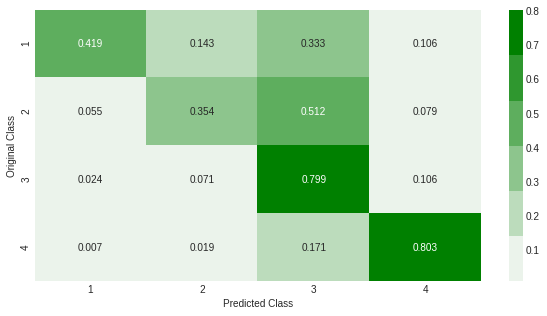

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
x_cfl=LGBMClassifier(n_estimators=1000, learning_rate=0.1, colsample_bytree=1, max_depth=10,subsample=0.7,nthread=-1
                    )
# feval=lgb_f1_macro
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict(X_train)
print ('\nFor values of best params train f1-micro',f1_score(y_train, predict_y,average='micro'))
predict_y = c_cfl.predict(X_cv)
print ('\nFor values of best params cv f1-micro',f1_score(y_cv, predict_y,average='micro'))
predict_y = c_cfl.predict(X_test)
print ('\nFor values of best params test f1-micro',f1_score(y_test, predict_y,average='micro'))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

# Performance Metrics of all Algorithms so far

In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model", "Eval Metric","Train Loss","CV Loss","Test Loss","% Misclassified"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["Basic",  "RF","LOG LOSS",0.79,0.92,0.92,37.6])
x.add_row(["Basic",  "RF","F1-macro",0.78,0.57,0.55,36])
x.add_row(["Basic",  "RF","F1-micro",0.66,0.61,0.61,38.3])
x.add_row(["Basic",  "LGBM","LOG LOSS",0.32,0.81,0.81,30])
x.add_row(["Basic",  "LGBM","F1-macro",0.78,0.57,0.55,36])
x.add_row(["Basic",  "LGBM","F1-micro",0.98,0.68,0.67,32.3])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])

print(x)

+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
|        Feature Set        |       Model        | Eval Metric | Train Loss | CV Loss | Test Loss | % Misclassified |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
|           Basic           |         RF         |   LOG LOSS  |    0.79    |   0.92  |    0.92   |       37.6      |
|           Basic           |         RF         |   F1-macro  |    0.78    |   0.57  |    0.55   |        36       |
|           Basic           |         RF         |   F1-micro  |    0.66    |   0.61  |    0.61   |       38.3      |
|           Basic           |        LGBM        |   LOG LOSS  |    0.32    |   0.81  |    0.81   |        30       |
|           Basic           |        LGBM        |   F1-

# INFERENCES FROM CONFUSION MATRIX OF THE MODEL LGBM (WITH LOG LOSS) AS THAT WAS THE BEST ONE

**1. We know that Class 3 and Class 4 constitute 70% of data.**

**2. From the Confusion matrix we see that**

- For the original class 3, 3012 point were correctly predicted as class 3, 397 as class 4, 262 as class 2, 70 as class 1
  
- For the original class 4, 2579 point were correctly predicted as class 4, 512 as class 3, 57 as class 2, 18 as class 1

- Lets also see ratios for which we have built 2 other matrices

**3. From Precision Matrix we see that**

- Here we are normalizing column matrix to 1 , that is precision matrix (column sum=1)

- Precision for Class 1 : 72.5%, Precision for Class 2 : 62.6%, Precision for Class 3 : 64.6%, Precision for Class 4 : 80%

- If you take the 1st column, 2nd row element which is 0.132 which 13.2%, this shows that even though it is predicted to be class 1, it actually belongs to class 2.

- Similarly if you take 2nd column, 3rd row element which is 0.211, 21.1%, this shows that 21.1% which actually belong to class 3 are predicted to be class 2.

**4. From Recall Matrix see see that.**

- Here are normalizing row matrix to 1 , that is Recall matrix (Row sum =1 )

- Recall means, how well my model is able to recall the actual class label.

- Of all the points that originally belong to class 1 only 44.6% of points were actually predicted as class 1, 14.5% of points were predicted as class 2, etc.

- Lets take off diagonal elements for class 3
- Lets take 3rd column, 2nd row, which is 0.45 which is 45%, which states that of all the points belonging to class 2, 45% of points were predicted to be class 3 , 8.1% of points were declared by model as class 4, 4.4% of points were declared by model as class 1.


# SET 2 Dataset : All features + 10 Autoencoder components

In [7]:
all_data_new_ae=pd.read_csv('/content/Drug_Marketing1/Drug_Marketing1/all_data_new.csv')

In [8]:
CLASS_LABEL ='physician_segment_ordinal'

In [9]:
print(f'\nTotal Dataset contains {all_data_new_ae.shape[0]} samples and {all_data_new_ae.shape[1]} variables')
features = [c for c in all_data_new_ae.columns if c not in [CLASS_LABEL]]
print(f'\nThe dataset contains {len(features)} features and 1 CLASS LABEL')


Total Dataset contains 48703 samples and 31 variables

The dataset contains 30 features and 1 CLASS LABEL


In [10]:
category_cols= ['physician_gender', 'physician_speciality', 'year_quarter']

In [11]:
numerical_cols = [c for c in features if c not in category_cols]
#numerical_cols.remove('physician_id')
numerical_cols

['brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'saving_cards_dropped',
 'vouchers_dropped',
 'total_seminar_as_attendee',
 'total_seminar_as_speaker',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_prescriptions_for_indication3',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'brand_web_impressions',
 'brand_ehr_impressions',
 'brand_enews_impressions',
 'brand_mobile_impressions',
 'brand_organic_web_visits',
 'brand_paidsearch_visits',
 'total_competitor_prescription',
 'new_prescriptions',
 'urban_population_perc_in_physician_locality',
 'percent_population_with_health_insurance_in_last10q',
 'physician_tenure',
 'physician_age']

In [12]:
all_data_new_ae = pd.get_dummies(all_data_new_ae, columns = category_cols)

In [13]:
y_class = all_data_new_ae[CLASS_LABEL]
CLASS_LABEL ='physician_segment_ordinal'
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(all_data_new_ae.drop(['physician_segment_ordinal'], axis=1), y_class,stratify=y_class,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [14]:
features = numerical_cols
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
X_train[features] = autoscaler.fit_transform(X_train[features])

In [15]:
X_cv[features] = autoscaler.transform(X_cv[features])
X_test[features] = autoscaler.transform(X_test[features])

In [16]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 31169
Number of data points in test data: 9741
Number of data points in cross validation data: 7793


In [17]:
# Reference : Applied AI Course:

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

**Feature Engg : Autoencoders**

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

no_of_inputs: 37


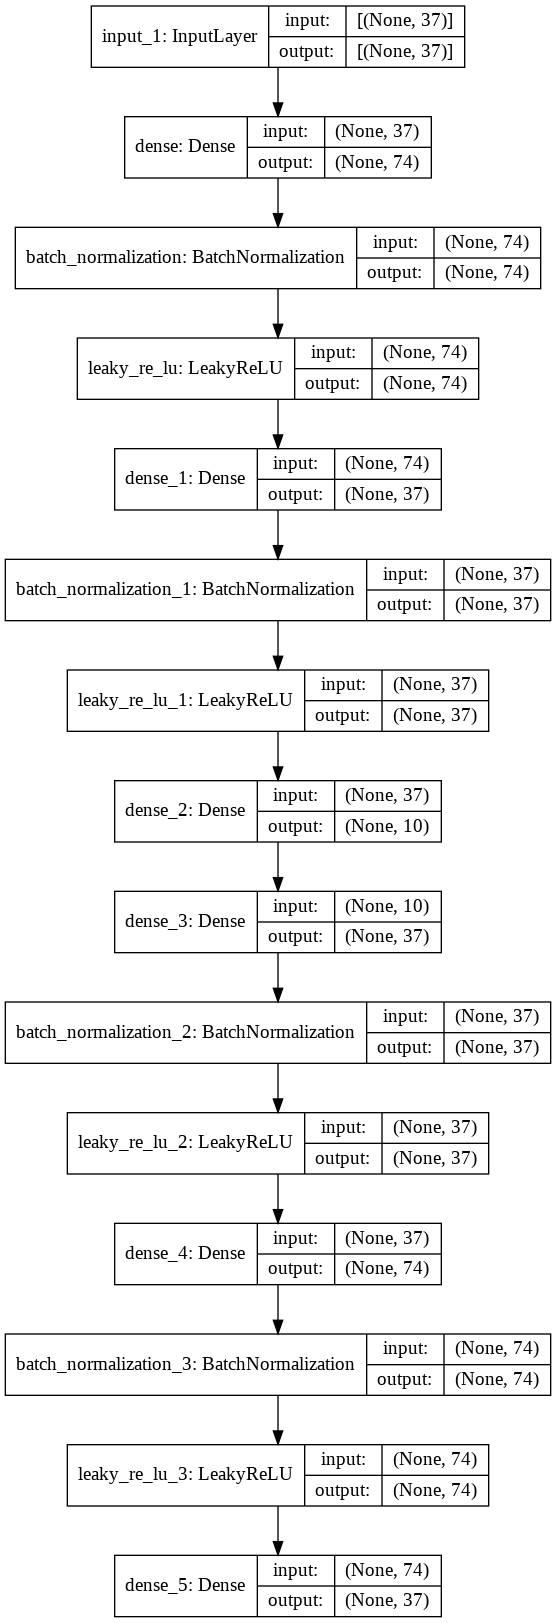

In [19]:
# Reference: https://machinelearningmastery.com/autoencoder-for-classification/
# number of input columns
no_of_inputs = X_train.shape[1]
print('no_of_inputs:',no_of_inputs)
# defining autoencoder
input_features = Input(shape=(no_of_inputs,))
# level 1 encoder
ae = Dense(no_of_inputs*2)(input_features)
ae = BatchNormalization()(ae)
ae = LeakyReLU()(ae)
# level 2 encoder
ae = Dense(no_of_inputs)(ae)
ae = BatchNormalization()(ae)
ae = LeakyReLU()(ae)
# bottleneck features
bottleneck_features = 10
bottleneck_features = Dense(bottleneck_features)(ae)
# level 1 decoder
de = Dense(no_of_inputs)(bottleneck_features)
de = BatchNormalization()(de)
de = LeakyReLU()(de)
# level 2 decoder
de = Dense(no_of_inputs*2)(de)
de = BatchNormalization()(de)
de = LeakyReLU()(de)
# output layer
output_features = Dense(no_of_inputs, activation='linear')(de)
# defining autoencoder model
model = Model(inputs=input_features, outputs=output_features)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)

**Fitting the model:**

NOTE : The autoencoder is being trained to reconstruct the input – that is the whole idea of the autoencoder.

In [ ]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_cv,X_cv))


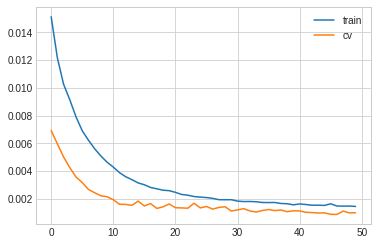

In [22]:
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='cv')
plt.legend()
plt.show()

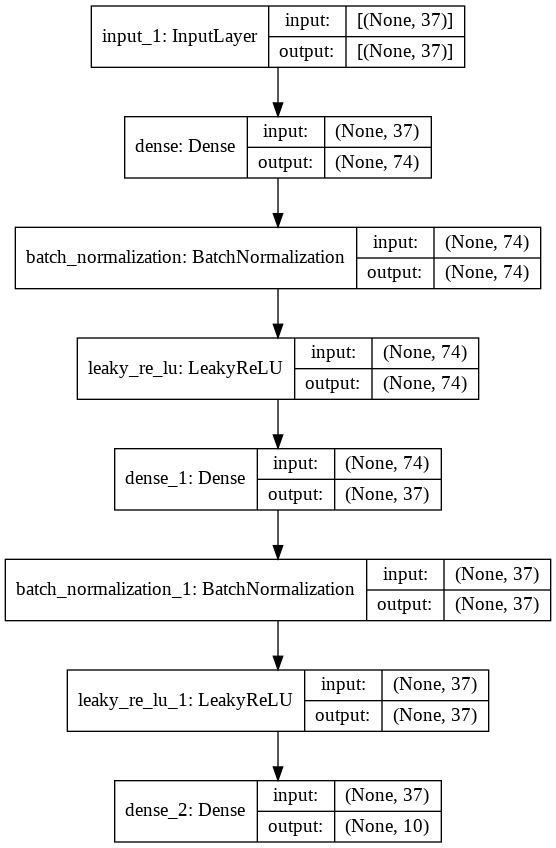

In [23]:
# define an encoder model only for feature engg.
encoder_features = Model(inputs=input_features, outputs=bottleneck_features)
plot_model(encoder_features, 'encoder_features.png', show_shapes=True)
# save the encoder to file
encoder_features.save('encoder_features.h5')

Load the model from File to use it as part of feature engg.

In [24]:
# load the model from file
encoder_features = load_model('/content/Drug_Marketing1/Drug_Marketing1/encoder_features.h5',compile=False)

In [25]:
# encodeing the train data
X_train_encode = encoder_features.predict(X_train)
# encoding the CV data
X_cv_encode = encoder_features.predict(X_cv)
# encoding the Test data
X_test_encode = encoder_features.predict(X_test)

In [26]:
X_train_encode.shape
X_cv_encode.shape
X_test_encode.shape

(31169, 10)

(7793, 10)

(9741, 10)

Now Adding these Autoencoder features to existing features

In [27]:
# Reference : https://stackoverflow.com/questions/49277682/python-pandas-concat-vertical-and-horizontal

X_train_ae = pd.DataFrame(data=X_train_encode, columns=("AE_1", "AE_2", "AE_3","AE_4", "AE_5", "AE_6","AE_7", "AE_8", "AE_9","AE_10"))

In [28]:
X_train_ae.head(5)

,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10
0,-0.269763,3.537327,0.752932,-0.720989,-7.059814,-2.554994,1.734966,-0.693402,0.291232,2.405617
1,-3.356182,3.740816,-6.199619,-1.491798,-0.996391,-1.988776,0.596808,-0.706805,5.286854,-3.386504
2,0.143779,3.298813,-2.994791,2.134927,-0.555834,-2.345541,-0.753840,2.073012,-1.041146,2.884773
3,1.003240,4.245808,2.564272,2.349245,-1.517933,4.757004,-0.512288,1.296440,-0.970584,-2.146443
4,3.236557,5.078035,1.839327,2.096406,-1.152829,-1.663820,3.180103,1.024800,-0.196216,-5.584595


In [30]:
X_cv_ae = pd.DataFrame(data=X_cv_encode, columns=("AE_1", "AE_2", "AE_3","AE_4", "AE_5", "AE_6","AE_7", "AE_8", "AE_9","AE_10"))
X_test_ae = pd.DataFrame(data=X_test_encode, columns=("AE_1", "AE_2", "AE_3","AE_4", "AE_5", "AE_6","AE_7", "AE_8", "AE_9","AE_10"))

In [31]:
X_train.index = X_train_ae.index
X_train = pd.concat([X_train, X_train_ae], axis= 1)

In [32]:
X_cv.index = X_cv_ae.index
X_cv = pd.concat([X_cv, X_cv_ae], axis= 1)
X_test.index = X_test_ae.index
X_test = pd.concat([X_test, X_test_ae], axis= 1)

- LGBM Classifier

In [33]:
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb

# Reference: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
#x_cfl=XGBClassifier()
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    'eval_metric':'multi_logloss'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 10.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [37]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 1, 'objective': 't', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'eval_metric': 'o', 'colsample_bytree': 0.7}",0.600436,10
1,"{'subsample': 0.7, 'objective': 'm', 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': 'm', 'colsample_bytree': 0.9}",0.627162,2
2,"{'subsample': 1, 'objective': 'c', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': 'g', 'colsample_bytree': 0.5}",0.624435,4
3,"{'subsample': 0.9, 'objective': 'l', 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.03, 'eval_metric': 's', 'colsample_bytree': 1}",0.620200,5
4,"{'subsample': 0.7, 'objective': 't', 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.05, 'eval_metric': 's', 'colsample_bytree': 0.5}",0.618948,6
5,"{'subsample': 0.7, 'objective': 'l', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': 'm', 'colsample_bytree': 1}",0.625269,3
6,"{'subsample': 0.5, 'objective': 's', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'eval_metric': 'g', 'colsample_bytree': 1}",0.617056,8
7,"{'subsample': 1, 'objective': 't', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'eval_metric': 'l', 'colsample_bytree': 0.5}",0.612435,9
8,"{'subsample': 0.7, 'objective': 'm', 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.1, 'eval_metric': 'g', 'colsample_bytree': 0.5}",0.618692,7
9,"{'subsample': 0.5, 'objective': 'l', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.15, 'eval_metric': 'l', 'colsample_bytree': 0.5}",0.630691,1


In [38]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.630690693315269
{'subsample': 0.5, 'objective': 'l', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.15, 'eval_metric': 'l', 'colsample_bytree': 0.5}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.15, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.5, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=0.5,
                                                     importance_type='split',
                                                     learning_rate=0.15,
                                                     max_depth=5,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=2000,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                   


For values of best params train loss 0.37619375158541823

For values of best params cv loss 0.8973797276381074

For values of best params test loss 0.911787647293711
Number of misclassified points  35.89980494815727
-------------------------------------------------- Confusion matrix --------------------------------------------------


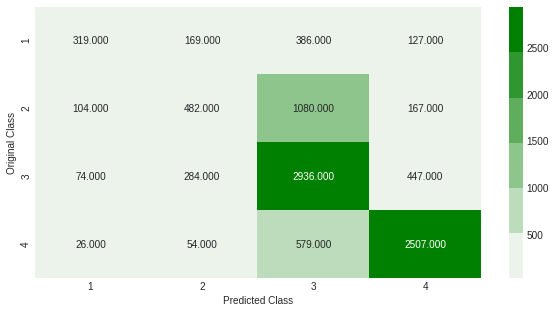

-------------------------------------------------- Precision matrix --------------------------------------------------


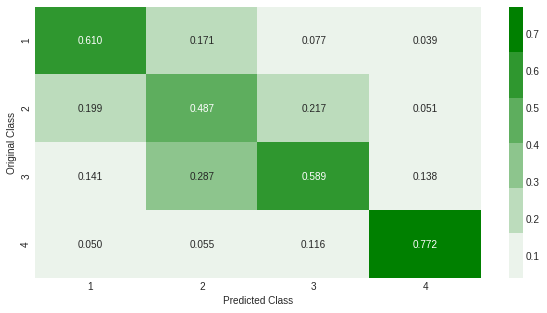

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


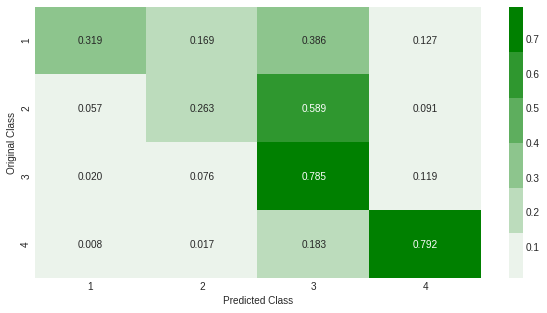

Sum of rows in precision matrix [1. 1. 1. 1.]


In [39]:
x_cfl=LGBMClassifier(n_estimators=2000, learning_rate=0.15, colsample_bytree=0.5, max_depth=5,subsample=0.5,nthread=-1
                    )
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('\nFor values of best params train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('\nFor values of best params cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('\nFor values of best params test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))


Getting Feature Importance

<Figure size 720x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 25 artists>

([<matplotlib.axis.YTick at 0x7f6c64f11bd0>,
 [Text(0, 0, 'brand_web_impressions'),
  Text(0, 0, 'total_sample_dropped'),
  Text(0, 0, 'urban_population_perc_in_physician_locality'),
  Text(0, 0, 'total_representative_visits'),
  Text(0, 0, 'physician_age'),
  Text(0, 0, 'AE_1'),
  Text(0, 0, 'AE_8'),
  Text(0, 0, 'AE_7'),
  Text(0, 0, 'AE_2'),
  Text(0, 0, 'AE_4'),
  Text(0, 0, 'AE_5'),
  Text(0, 0, 'physician_tenure'),
  Text(0, 0, 'AE_6'),
  Text(0, 0, 'AE_3'),
  Text(0, 0, 'new_prescriptions'),
  Text(0, 0, 'AE_9'),
  Text(0, 0, 'total_patient_with_medicaid_insurance_plan'),
  Text(0, 0, 'AE_10'),
  Text(0, 0, 'total_prescriptions_for_indication2'),
  Text(0, 0, 'percent_population_with_health_insurance_in_last10q'),
  Text(0, 0, 'total_prescriptions_for_indication1'),
  Text(0, 0, 'total_competitor_prescription'),
  Text(0, 0, 'total_prescriptions_for_indication3'),
  Text(0, 0, 'total_patient_with_medicare_insurance_plan'),
  Text(0, 0, 'total_patient_with_commercial_insurance_pl

Text(0.5, 0, 'Relative Importance')

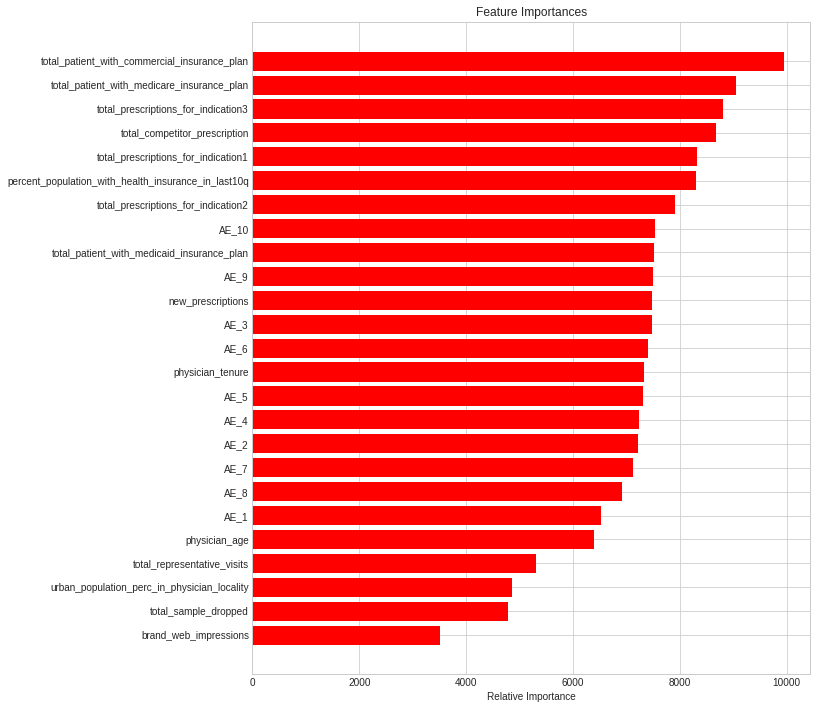

In [42]:
features = X_train.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [48]:
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='f1_macro')
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 22.0min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [49]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 0.7, 'objective': 'c', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.5}",0.546644,3
1,"{'subsample': 0.7, 'objective': 'm', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.9}",0.505504,7
2,"{'subsample': 0.7, 'objective': 'l', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.9}",0.553109,2
3,"{'subsample': 0.5, 'objective': 's', 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.9}",0.539664,4
4,"{'subsample': 0.7, 'objective': 'm', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}",0.502938,8
5,"{'subsample': 0.9, 'objective': 't', 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.5}",0.516521,6
6,"{'subsample': 1, 'objective': 'l', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1}",0.524848,5
7,"{'subsample': 0.7, 'objective': 'u', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.5}",0.502557,9
8,"{'subsample': 1, 'objective': 'l', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.7}",0.564385,1
9,"{'subsample': 0.7, 'objective': 'u', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.15, 'colsample_bytree': 0.7}",0.499427,10


In [50]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.5643853347761819
{'subsample': 1, 'objective': 'l', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.7}


In [51]:
x_cfl=LGBMClassifier(n_estimators=1000, learning_rate=0.1, colsample_bytree=1, max_depth=10,subsample=0.7,nthread=-1
                    )
# feval=lgb_f1_macro
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
               importance_type='split', learning_rate=0.1, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.7, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1,
                                                     importance_type='split',
                                                     learning_rate=0.1,
                                                     max_depth=10,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=1000,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                     


For values of best params train f1-macro 0.9937292926134442

For values of best params cv f1-macro 0.5684521900587551

For values of best params test f1-macro 0.5638386031181758
Number of misclassified points  34.94507750744277
-------------------------------------------------- Confusion matrix --------------------------------------------------


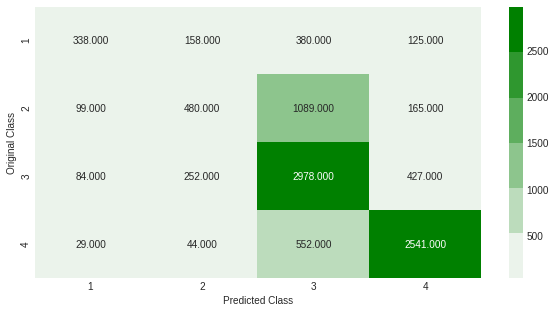

-------------------------------------------------- Precision matrix --------------------------------------------------


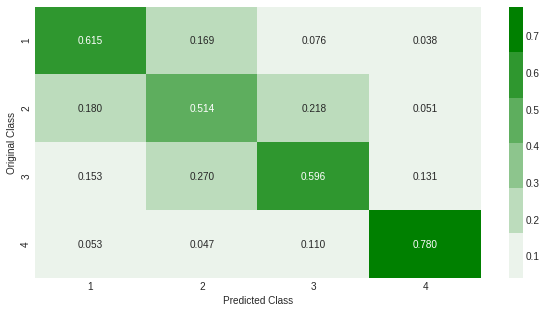

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


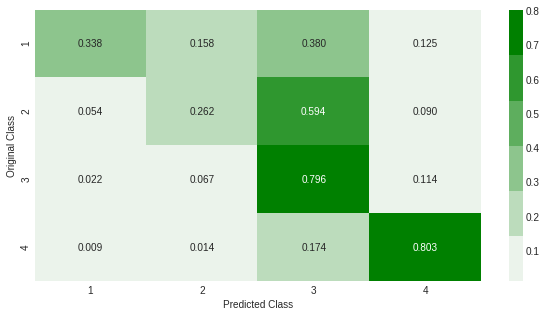

Sum of rows in precision matrix [1. 1. 1. 1.]


In [52]:
predict_y = c_cfl.predict(X_train)
print ('\nFor values of best params train f1-macro',f1_score(y_train, predict_y,average='macro'))
predict_y = c_cfl.predict(X_cv)
print ('\nFor values of best params cv f1-macro',f1_score(y_cv, predict_y,average='macro'))
predict_y = c_cfl.predict(X_test)
print ('\nFor values of best params test f1-macro',f1_score(y_test, predict_y,average='macro'))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

LGBM Classifier - with F1-Micro Metric

In [43]:
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,scoring='f1_micro')
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.6min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [44]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 0.7, 'objective': 's', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1}",0.627675,3
1,"{'subsample': 0.7, 'objective': 'u', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}",0.618628,9
2,"{'subsample': 0.5, 'objective': 'u', 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1}",0.617922,10
3,"{'subsample': 0.7, 'objective': 's', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.9}",0.620328,5
4,"{'subsample': 0.7, 'objective': 'a', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}",0.619783,6
5,"{'subsample': 0.9, 'objective': 'l', 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 1}",0.618692,7
6,"{'subsample': 0.5, 'objective': 's', 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.9}",0.618692,8
7,"{'subsample': 0.5, 'objective': 's', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 1}",0.635952,1
8,"{'subsample': 0.5, 'objective': 't', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}",0.624435,4
9,"{'subsample': 0.9, 'objective': 'l', 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.7}",0.629440,2


In [45]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.6359523994453234
{'subsample': 0.5, 'objective': 's', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 1}


In [46]:
x_cfl=LGBMClassifier(n_estimators=500, learning_rate=0.15, colsample_bytree=1, max_depth=10,subsample=0.5,nthread=-1
                    )
# feval=lgb_f1_macro
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
               importance_type='split', learning_rate=0.15, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.5, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=1,
                                                     importance_type='split',
                                                     learning_rate=0.15,
                                                     max_depth=10,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=500,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                     


For values of best params train f1-micro 0.9716384869581957

For values of best params cv f1-micro 0.6507121775952778

For values of best params test f1-micro 0.6434657632686582
Number of misclassified points  35.65342367313418
-------------------------------------------------- Confusion matrix --------------------------------------------------


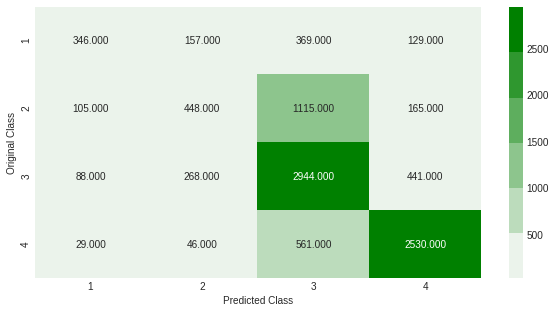

-------------------------------------------------- Precision matrix --------------------------------------------------


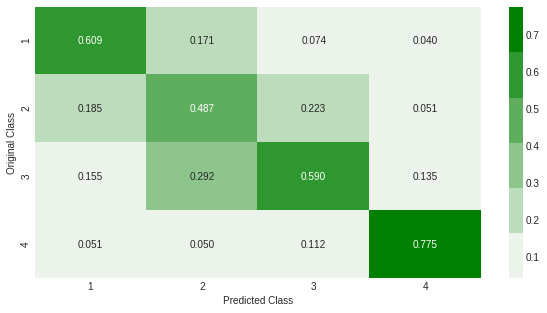

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


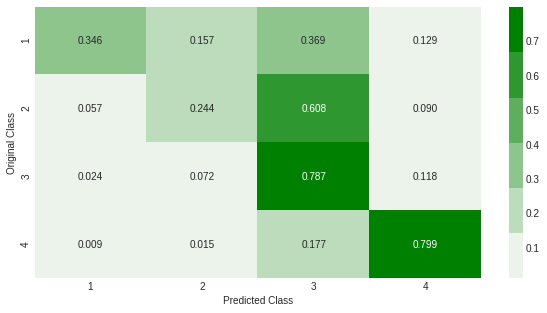

Sum of rows in precision matrix [1. 1. 1. 1.]


In [47]:
predict_y = c_cfl.predict(X_train)
print ('\nFor values of best params train f1-micro',f1_score(y_train, predict_y,average='micro'))
predict_y = c_cfl.predict(X_cv)
print ('\nFor values of best params cv f1-micro',f1_score(y_cv, predict_y,average='micro'))
predict_y = c_cfl.predict(X_test)
print ('\nFor values of best params test f1-micro',f1_score(y_test, predict_y,average='micro'))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

- Logistic Regression

SGDClassifier(alpha=1e-05, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                    

SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                     

SGDClassifier(alpha=1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                       

SGDClassifier(alpha=10, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=10, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                      

SGDClassifier(alpha=100, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=100, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                     

SGDClassifier(alpha=1000, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1000, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                    

log_loss for c =  1e-05 is 1.045104861882093
log_loss for c =  0.0001 is 1.0236498812984784
log_loss for c =  0.001 is 1.053288820925475
log_loss for c =  0.01 is 1.1506422003810923
log_loss for c =  0.1 is 1.205579107794005
log_loss for c =  1 is 1.2176614269355417
log_loss for c =  10 is 1.2380914818901847
log_loss for c =  100 is 1.2527782499141698
log_loss for c =  1000 is 1.2536280352998077


Text(1e-05, 1.045104861882093, '(1e-05, 1.045)')

Text(0.0001, 1.0236498812984784, '(0.0001, 1.024)')

Text(0.001, 1.053288820925475, '(0.001, 1.053)')

Text(0.01, 1.1506422003810923, '(0.01, 1.151)')

Text(0.1, 1.205579107794005, '(0.1, 1.206)')

Text(1, 1.2176614269355417, '(1, 1.218)')

Text(10, 1.2380914818901847, '(10, 1.238)')

Text(100, 1.2527782499141698, '(100, 1.253)')

Text(1000, 1.2536280352998077, '(1000, 1.254)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

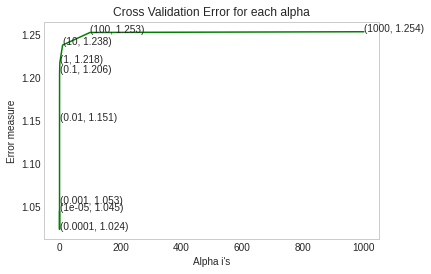

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

log loss for train data 1.0359832288240263
log loss for cv data 1.0284829369822799
log loss for test data 1.0375053523987072
Number of misclassified points  43.16805256133867
-------------------------------------------------- Confusion matrix --------------------------------------------------


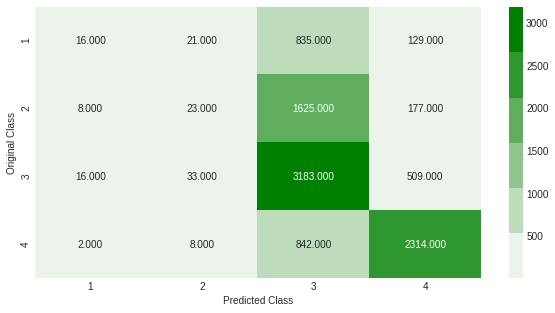

-------------------------------------------------- Precision matrix --------------------------------------------------


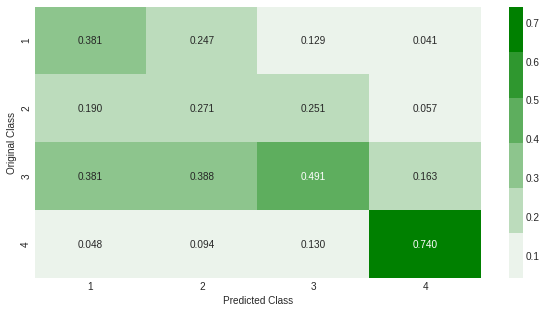

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


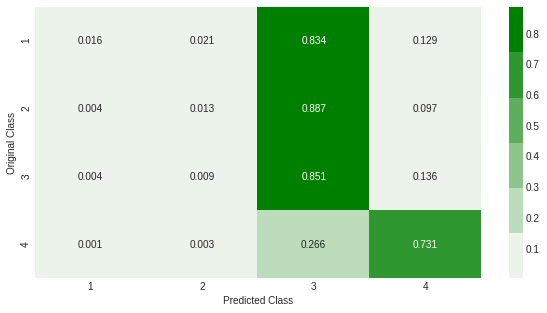

Sum of rows in precision matrix [1. 1. 1. 1.]


In [54]:
# Reference Applied AI Course
alpha_param = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha_param:
    svm=SGDClassifier(penalty='l2',alpha=i,class_weight='balanced',loss='log')
    svm.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(svm, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=svm.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha_param[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha_param, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha_param[i],np.round(txt,3)), (alpha_param[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

svm=SGDClassifier(penalty='l2',alpha=alpha_param[best_alpha],class_weight='balanced',loss='log')
svm.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(svm, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=svm.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

In [55]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model", "Eval Metric","Train Loss","CV Loss","Test Loss","% Misclassified"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["Basic+AE",  "LGBM","LOG LOSS",0.37,0.89,0.91,35.8])
x.add_row(["Basic+AE",  "LGBM","F1-Macro",0.99,0.56,0.56,34.9])
x.add_row(["Basic+AE",  "LGBM","F1-Micro",0.97,0.65,0.64,35.6])
x.add_row(["Basic+AE",  "LR","LOG LOSS",1.03,1.02,1.03,43.1])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])

print(x)

+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
|        Feature Set        |       Model        | Eval Metric | Train Loss | CV Loss | Test Loss | % Misclassified |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
|          Basic+AE         |        LGBM        |   LOG LOSS  |    0.37    |   0.89  |    0.91   |       35.8      |
|          Basic+AE         |        LGBM        |   F1-Macro  |    0.99    |   0.56  |    0.56   |       34.9      |
|          Basic+AE         |        LGBM        |   F1-Micro  |    0.97    |   0.65  |    0.64   |       35.6      |
|          Basic+AE         |         LR         |   LOG LOSS  |    1.03    |   1.02  |    1.03   |       43.1      |
| ------------------------- | ------------------ |     -

# SET 3 Dataset : All features + 5 PCA components 

In [56]:
all_data_new_pca=pd.read_csv('/content/Drug_Marketing1/Drug_Marketing1/all_data_new.csv')

In [58]:
CLASS_LABEL ='physician_segment_ordinal'
print(f'\nTotal Dataset contains {all_data_new_pca.shape[0]} samples and {all_data_new_pca.shape[1]} variables')
features = [c for c in all_data_new_pca.columns if c not in [CLASS_LABEL]]
print(f'\nThe dataset contains {len(features)} features and 1 CLASS LABEL')


Total Dataset contains 48703 samples and 31 variables

The dataset contains 30 features and 1 CLASS LABEL


In [59]:
category_cols= ['physician_gender', 'physician_speciality', 'year_quarter']
numerical_cols = [c for c in features if c not in category_cols]
#numerical_cols.remove('physician_id')
numerical_cols


['brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'saving_cards_dropped',
 'vouchers_dropped',
 'total_seminar_as_attendee',
 'total_seminar_as_speaker',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_prescriptions_for_indication3',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'brand_web_impressions',
 'brand_ehr_impressions',
 'brand_enews_impressions',
 'brand_mobile_impressions',
 'brand_organic_web_visits',
 'brand_paidsearch_visits',
 'total_competitor_prescription',
 'new_prescriptions',
 'urban_population_perc_in_physician_locality',
 'percent_population_with_health_insurance_in_last10q',
 'physician_tenure',
 'physician_age']

In [60]:
all_data_new_pca = pd.get_dummies(all_data_new_pca, columns = category_cols)

In [61]:
y_class = all_data_new_pca[CLASS_LABEL]
CLASS_LABEL ='physician_segment_ordinal'
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(all_data_new_pca.drop(['physician_segment_ordinal'], axis=1), y_class,stratify=y_class,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [62]:
features = numerical_cols
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
X_train[features] = autoscaler.fit_transform(X_train[features])

In [63]:
X_cv[features] = autoscaler.transform(X_cv[features])
X_test[features] = autoscaler.transform(X_test[features])

In [64]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 31169
Number of data points in test data: 9741
Number of data points in cross validation data: 7793


**Logic for PCA 5 components**

In [65]:
# Reference: Applied AI Course 
from sklearn import decomposition
pca = decomposition.PCA()


In [66]:
pca.n_components = 5
X_train_pca = pca.fit_transform(X_train)
X_cv_pca = pca.transform(X_cv)
X_test_pca = pca.transform(X_test)

In [67]:
# pca_reduced will contain the 2-d projects of simple data
print("shape of X_train_pca.shape = ", X_train_pca.shape)

shape of X_train_pca.shape =  (31169, 5)


In [68]:
X_train_pca = pd.DataFrame(data=X_train_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))

In [69]:
X_cv_pca = pd.DataFrame(data=X_cv_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))
X_test_pca = pd.DataFrame(data=X_test_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))

In [71]:
X_train.index = X_train_pca.index
X_train = pd.concat([X_train, X_train_pca], axis= 1)

In [72]:
X_cv.index = X_cv_pca.index
X_cv = pd.concat([X_cv, X_cv_pca], axis= 1)
X_test.index = X_test_pca.index
X_test = pd.concat([X_test, X_test_pca], axis= 1)

- LGBM Classifier with Log Loss

In [73]:
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb

# Reference: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
#x_cfl=XGBClassifier()
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    'eval_metric':'multi_logloss'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [74]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 0.7, 'objective': 's', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'eval_metric': '_', 'colsample_bytree': 0.7}",0.622189,5
1,"{'subsample': 1, 'objective': 'l', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'eval_metric': 'l', 'colsample_bytree': 0.9}",0.621130,6
2,"{'subsample': 0.7, 'objective': 'i', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'eval_metric': 'l', 'colsample_bytree': 1}",0.607013,10
3,"{'subsample': 0.9, 'objective': 'u', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.15, 'eval_metric': 'i', 'colsample_bytree': 0.5}",0.648946,1
4,"{'subsample': 0.7, 'objective': 'm', 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'eval_metric': 'o', 'colsample_bytree': 0.7}",0.618178,7
5,"{'subsample': 0.7, 'objective': 'l', 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.2, 'eval_metric': '_', 'colsample_bytree': 0.9}",0.627290,3
6,"{'subsample': 0.9, 'objective': 'i', 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.03, 'eval_metric': 's', 'colsample_bytree': 0.5}",0.617472,8
7,"{'subsample': 0.7, 'objective': 't', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'eval_metric': 'l', 'colsample_bytree': 0.9}",0.617152,9
8,"{'subsample': 0.5, 'objective': 'l', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.05, 'eval_metric': 'u', 'colsample_bytree': 0.9}",0.641920,2
9,"{'subsample': 0.9, 'objective': 't', 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.2, 'eval_metric': 's', 'colsample_bytree': 0.9}",0.627290,3


In [75]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.648946115146384
{'subsample': 0.9, 'objective': 'u', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.15, 'eval_metric': 'i', 'colsample_bytree': 0.5}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
               importance_type='split', learning_rate=0.15, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=2000, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.9, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=0.5,
                                                     importance_type='split',
                                                     learning_rate=0.15,
                                                     max_depth=5,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=2000,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                   


For values of best params train loss 0.35135970999384086

For values of best params cv loss 0.873586738440273

For values of best params test loss 0.8734862961796029
Number of misclassified points  33.98008418026897
-------------------------------------------------- Confusion matrix --------------------------------------------------


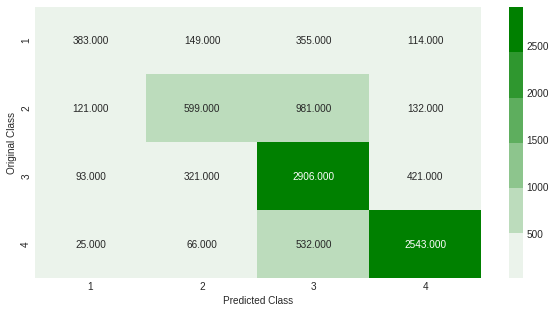

-------------------------------------------------- Precision matrix --------------------------------------------------


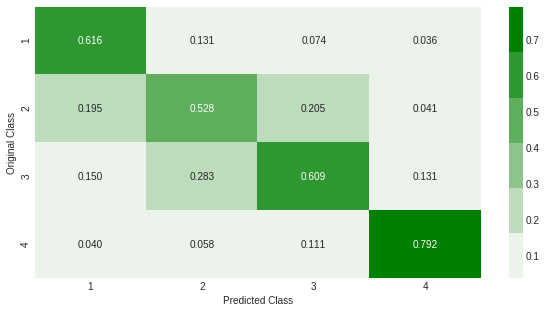

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


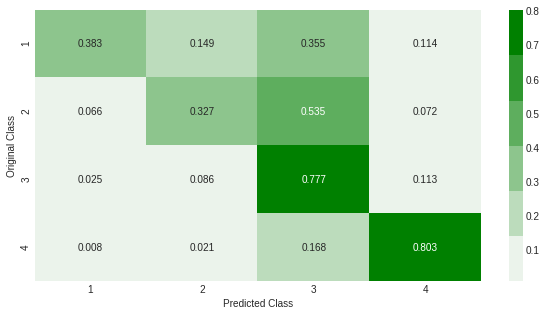

Sum of rows in precision matrix [1. 1. 1. 1.]


In [76]:
x_cfl=LGBMClassifier(n_estimators=2000, learning_rate=0.15, colsample_bytree=0.5, max_depth=5,subsample=0.9,nthread=-1
                    )
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)
predict_y = c_cfl.predict_proba(X_train)
print ('\nFor values of best params train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('\nFor values of best params cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('\nFor values of best params test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))


<Figure size 720x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 25 artists>

([<matplotlib.axis.YTick at 0x7f6c5bc50ad0>,
 [Text(0, 0, 'total_seminar_as_attendee'),
  Text(0, 0, 'brand_enews_impressions'),
  Text(0, 0, 'brand_mobile_impressions'),
  Text(0, 0, 'saving_cards_dropped'),
  Text(0, 0, 'brand_ehr_impressions'),
  Text(0, 0, 'brand_web_impressions'),
  Text(0, 0, 'total_sample_dropped'),
  Text(0, 0, 'total_representative_visits'),
  Text(0, 0, 'urban_population_perc_in_physician_locality'),
  Text(0, 0, 'PCA_5'),
  Text(0, 0, 'PCA_3'),
  Text(0, 0, 'PCA_4'),
  Text(0, 0, 'physician_age'),
  Text(0, 0, 'PCA_2'),
  Text(0, 0, 'total_patient_with_medicaid_insurance_plan'),
  Text(0, 0, 'physician_tenure'),
  Text(0, 0, 'new_prescriptions'),
  Text(0, 0, 'total_prescriptions_for_indication2'),
  Text(0, 0, 'total_competitor_prescription'),
  Text(0, 0, 'total_prescriptions_for_indication1'),
  Text(0, 0, 'PCA_1'),
  Text(0, 0, 'total_prescriptions_for_indication3'),
  Text(0, 0, 'percent_population_with_health_insurance_in_last10q'),
  Text(0, 0, 'total

Text(0.5, 0, 'Relative Importance')

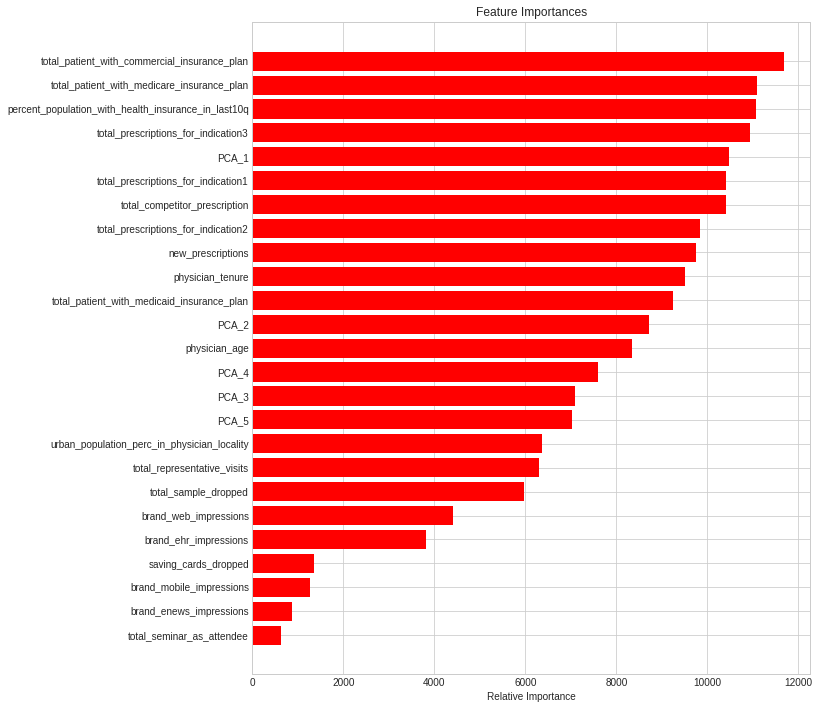

In [77]:
features = X_train.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Logistic Regression

SGDClassifier(alpha=1e-05, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1e-05, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                   

SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                    

SGDClassifier(alpha=0.1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                     

SGDClassifier(alpha=1, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                       

SGDClassifier(alpha=10, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=10, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                      

SGDClassifier(alpha=100, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=100, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                     

SGDClassifier(alpha=1000, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=1000, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                    

log_loss for c =  1e-05 is 1.0226152910460862
log_loss for c =  0.0001 is 1.0218947043315605
log_loss for c =  0.001 is 1.0564520942363607
log_loss for c =  0.01 is 1.1689206889695731
log_loss for c =  0.1 is 1.2230215140042686
log_loss for c =  1 is 1.237606835504933
log_loss for c =  10 is 1.2578532333832055
log_loss for c =  100 is 1.2610863172314162
log_loss for c =  1000 is 1.261332272809434


Text(1e-05, 1.0226152910460862, '(1e-05, 1.023)')

Text(0.0001, 1.0218947043315605, '(0.0001, 1.022)')

Text(0.001, 1.0564520942363607, '(0.001, 1.056)')

Text(0.01, 1.1689206889695731, '(0.01, 1.169)')

Text(0.1, 1.2230215140042686, '(0.1, 1.223)')

Text(1, 1.237606835504933, '(1, 1.238)')

Text(10, 1.2578532333832055, '(10, 1.258)')

Text(100, 1.2610863172314162, '(100, 1.261)')

Text(1000, 1.261332272809434, '(1000, 1.261)')

Text(0.5, 1.0, 'Cross Validation Error for each alpha')

Text(0.5, 0, "Alpha i's")

Text(0, 0.5, 'Error measure')

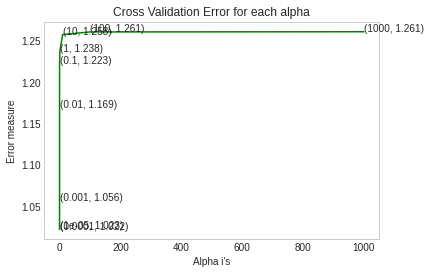

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False,
                                                    class_weight='balanced',
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='log', max_iter=1000,
                                                    n_iter_no_change=5,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=None,
                                                    shuffle=True, tol=0.001,
                                  

log loss for train data 1.0169225138143638
log loss for cv data 1.021393509281498
log loss for test data 1.0127036931795008
Number of misclassified points  42.46997228210656
-------------------------------------------------- Confusion matrix --------------------------------------------------


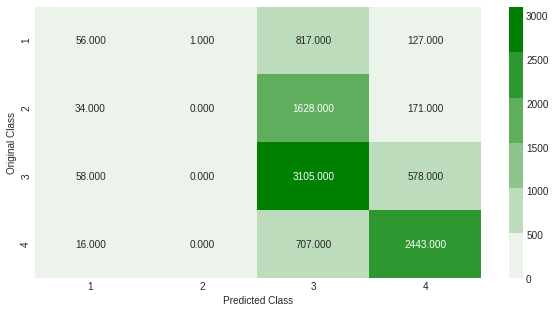

-------------------------------------------------- Precision matrix --------------------------------------------------


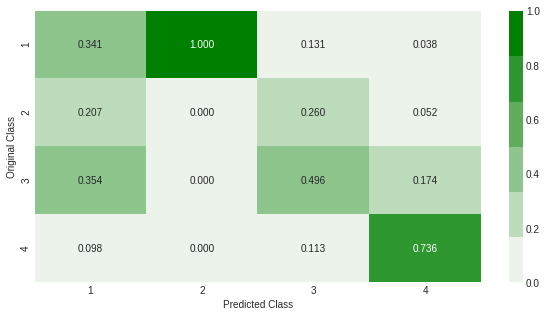

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


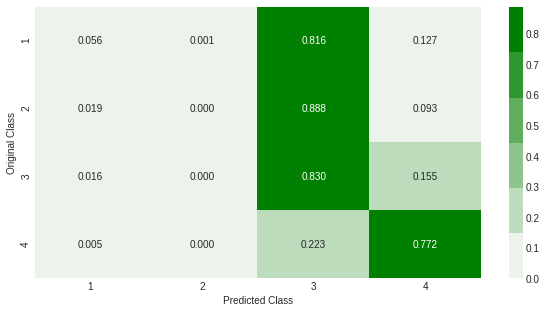

Sum of rows in precision matrix [1. 1. 1. 1.]


In [78]:
# Reference Applied AI Course
alpha_param = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha_param:
    svm=SGDClassifier(penalty='l2',alpha=i,class_weight='balanced',loss='log')
    svm.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(svm, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=svm.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha_param[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha_param, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha_param[i],np.round(txt,3)), (alpha_param[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

svm=SGDClassifier(penalty='l2',alpha=alpha_param[best_alpha],class_weight='balanced',loss='log')
svm.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(svm, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=svm.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

In [79]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model", "Eval Metric","Train Loss","CV Loss","Test Loss","% Misclassified"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["Basic+pca",  "LGBM","LOG LOSS",0.35,0.87,0.87,33.9])
x.add_row(["Basic+pca",  "LR","LOG LOSS",1.01,1.02,1.01,42.4])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])

print(x)

+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
|        Feature Set        |       Model        | Eval Metric | Train Loss | CV Loss | Test Loss | % Misclassified |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
|         Basic+pca         |        LGBM        |   LOG LOSS  |    0.35    |   0.87  |    0.87   |       33.9      |
|         Basic+pca         |         LR         |   LOG LOSS  |    1.01    |   1.02  |    1.01   |       42.4      |
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+


# SET 4 Dataset : Most important features which influence the target

In [155]:
all_data_selected=pd.read_csv('/content/Drug_Marketing1/Drug_Marketing1/all_data_new.csv')

In [156]:
CLASS_LABEL ='physician_segment_ordinal'
print(f'\nTotal Dataset contains {all_data_selected.shape[0]} samples and {all_data_selected.shape[1]} variables')
features = [c for c in all_data_selected.columns if c not in [CLASS_LABEL]]
print(f'\nThe dataset contains {len(features)} features and 1 CLASS LABEL')


Total Dataset contains 48703 samples and 31 variables

The dataset contains 30 features and 1 CLASS LABEL


In [157]:
category_cols= ['physician_gender', 'physician_speciality', 'year_quarter']
numerical_cols = [c for c in features if c not in category_cols]


In [158]:
all_data_selected.drop(['saving_cards_dropped','vouchers_dropped','total_seminar_as_attendee','total_seminar_as_speaker'
,'total_prescriptions_for_indication3','brand_web_impressions','brand_ehr_impressions','brand_enews_impressions','brand_mobile_impressions'
,'brand_organic_web_visits','brand_paidsearch_visits','urban_population_perc_in_physician_locality','percent_population_with_health_insurance_in_last10q'
,'physician_tenure','physician_age'], axis = 1,inplace = True)

In [159]:
all_data_selected.head(5)

,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_gender,physician_speciality,physician_segment_ordinal
0,201903-Q3,1,9,39,0,1,46,20,28,76,28,165,42,M,nephrology,3
1,201904-Q4,1,4,12,0,1,43,18,22,72,36,169,45,M,nephrology,3
2,202001-Q1,1,14,26,0,1,53,17,33,80,33,198,49,M,nephrology,3
3,202002-Q2,1,18,20,0,1,45,19,38,67,28,170,46,M,nephrology,3
4,202003-Q3,1,5,96,0,1,48,25,35,75,31,169,0,M,nephrology,2


In [160]:
features = [c for c in all_data_selected.columns if c not in [CLASS_LABEL]]
features

['year_quarter',
 'brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'total_competitor_prescription',
 'new_prescriptions',
 'physician_gender',
 'physician_speciality']

In [161]:
all_data_selected = pd.get_dummies(all_data_selected, columns = category_cols)

In [162]:
all_data_selected.head(5)

,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_segment_ordinal,physician_gender_F,physician_gender_M,physician_speciality_nephrology,physician_speciality_other,physician_speciality_urology,year_quarter_201903-Q3,year_quarter_201904-Q4,year_quarter_202001-Q1,year_quarter_202002-Q2,year_quarter_202003-Q3
0,1,9,39,0,1,46,20,28,76,28,165,42,3,0,1,1,0,0,1,0,0,0,0
1,1,4,12,0,1,43,18,22,72,36,169,45,3,0,1,1,0,0,0,1,0,0,0
2,1,14,26,0,1,53,17,33,80,33,198,49,3,0,1,1,0,0,0,0,1,0,0
3,1,18,20,0,1,45,19,38,67,28,170,46,3,0,1,1,0,0,0,0,0,1,0
4,1,5,96,0,1,48,25,35,75,31,169,0,2,0,1,1,0,0,0,0,0,0,1


In [163]:
y_class = all_data_selected[CLASS_LABEL]
CLASS_LABEL ='physician_segment_ordinal'
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(all_data_selected.drop(['physician_segment_ordinal'], axis=1), y_class,stratify=y_class,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)


In [ ]:
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
X_train[features] = autoscaler.fit_transform(X_train[features])

In [101]:
X_cv[features] = autoscaler.transform(X_cv[features])
X_test[features] = autoscaler.transform(X_test[features])

In [102]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 31169
Number of data points in test data: 9741
Number of data points in cross validation data: 7793


In [103]:
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    'eval_metric':'multi_logloss'
}

=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.6min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [104]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 1, 'objective': 'u', 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.03, 'eval_metric': 's', 'colsample_bytree': 0.9}",0.618274,1
1,"{'subsample': 0.7, 'objective': 's', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': 'l', 'colsample_bytree': 0.5}",0.616028,4
2,"{'subsample': 0.9, 'objective': 's', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': 't', 'colsample_bytree': 1}",0.604094,9
3,"{'subsample': 1, 'objective': 'a', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'eval_metric': 'g', 'colsample_bytree': 0.5}",0.608136,8
4,"{'subsample': 0.7, 'objective': 'l', 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'eval_metric': '_', 'colsample_bytree': 1}",0.618146,2
5,"{'subsample': 1, 'objective': 'c', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.1, 'eval_metric': 'g', 'colsample_bytree': 1}",0.609772,7
6,"{'subsample': 0.5, 'objective': 'l', 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': 'u', 'colsample_bytree': 0.9}",0.616382,3
7,"{'subsample': 0.9, 'objective': 's', 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.03, 'eval_metric': 'l', 'colsample_bytree': 0.5}",0.614456,6
8,"{'subsample': 0.9, 'objective': 't', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'eval_metric': 'l', 'colsample_bytree': 1}",0.615804,5
9,"{'subsample': 0.5, 'objective': 'l', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.2, 'eval_metric': 's', 'colsample_bytree': 1}",0.603613,10


In [105]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)


0.618274332427385
{'subsample': 1, 'objective': 'u', 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.03, 'eval_metric': 's', 'colsample_bytree': 0.9}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.03, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=0.9,
                                                     importance_type='split',
                                                     learning_rate=0.03,
                                                     max_depth=5,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=500,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                    


For values of best params train loss 0.8531361861221219

For values of best params cv loss 0.9402755186738013

For values of best params test loss 0.942743767421682
Number of misclassified points  38.41494713068474
-------------------------------------------------- Confusion matrix --------------------------------------------------


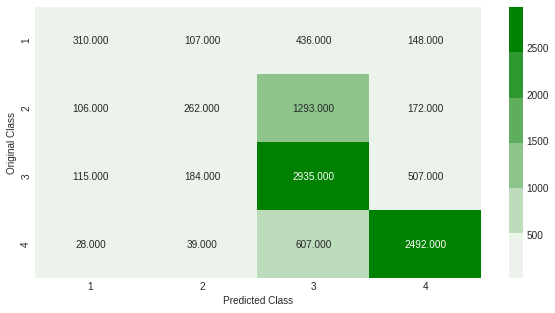

-------------------------------------------------- Precision matrix --------------------------------------------------


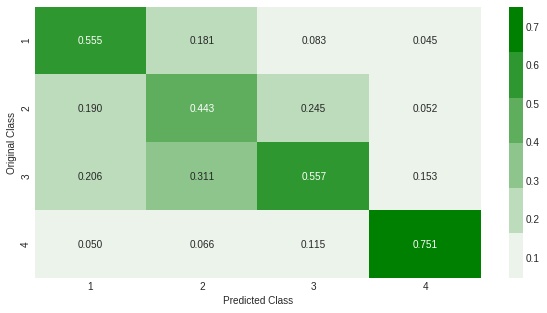

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


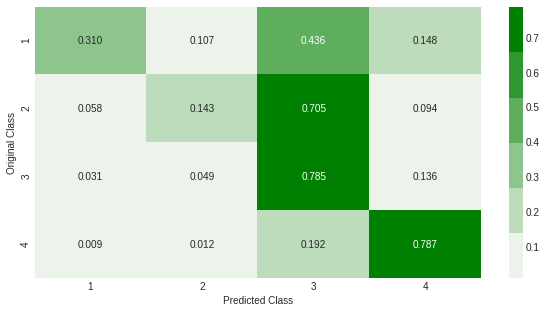

Sum of rows in precision matrix [1. 1. 1. 1.]


In [106]:
x_cfl=LGBMClassifier(n_estimators=500, learning_rate=0.03, colsample_bytree=0.9, max_depth=5,subsample=1,nthread=-1
                    )
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)
predict_y = c_cfl.predict_proba(X_train)
print ('\nFor values of best params train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('\nFor values of best params cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('\nFor values of best params test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

<Figure size 720x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.YTick at 0x7f6c65117090>,
 [Text(0, 0, 'year_quarter_202002-Q2'),
  Text(0, 0, 'year_quarter_202001-Q1'),
  Text(0, 0, 'physician_speciality_other'),
  Text(0, 0, 'physician_in_group_practice'),
  Text(0, 0, 'physician_speciality_nephrology'),
  Text(0, 0, 'physician_hospital_affiliation'),
  Text(0, 0, 'year_quarter_201904-Q4'),
  Text(0, 0, 'year_quarter_201903-Q3'),
  Text(0, 0, 'physician_gender_F'),
  Text(0, 0, 'brand_prescribed'),
  Text(0, 0, 'year_quarter_202003-Q3'),
  Text(0, 0, 'total_sample_dropped'),
  Text(0, 0, 'new_prescriptions'),
  Text(0, 0, 'total_prescriptions_for_indication2'),
  Text(0, 0, 'total_patient_with_medicaid_insurance_plan'),
  Text(0, 0, 'total_representative_visits'),
  Text(0, 0, 'total_patient_with_medicare_insurance_plan'),
  Text(0, 0, 'total_prescriptions_for_indication1'),
  Text(0, 0, 'total_competitor_prescription'),
  Text(0, 0, 'total_patient_with_commercial_insurance_plan')])

Text(0.5, 0, 'Relative Importance')

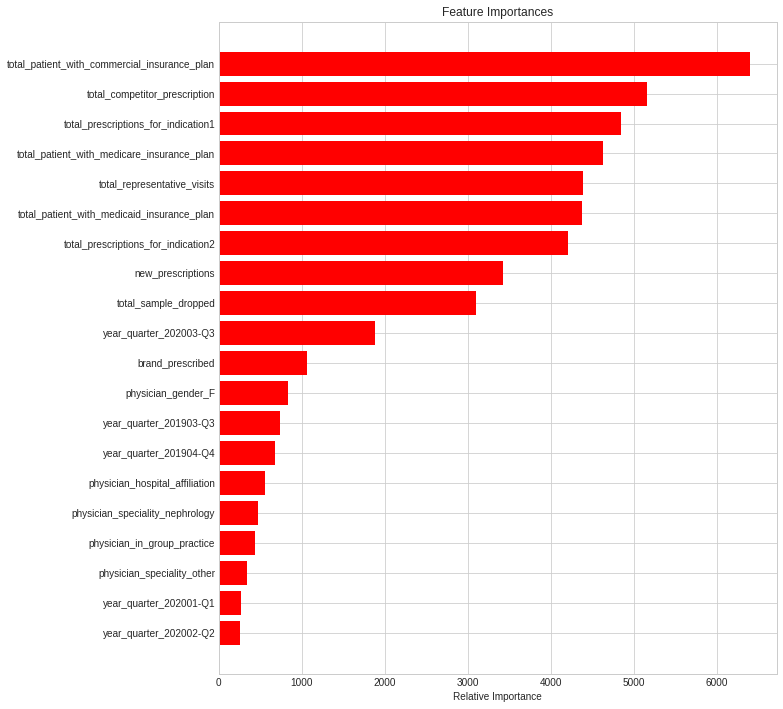

In [108]:
features = X_train.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [109]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model", "Eval Metric","Train Loss","CV Loss","Test Loss","% Misclassified"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["selected features",  "LGBM","LOG LOSS",0.85,0.94,0.94,38.4])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])

print(x)

+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
|        Feature Set        |       Model        | Eval Metric | Train Loss | CV Loss | Test Loss | % Misclassified |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
|     selected features     |        LGBM        |   LOG LOSS  |    0.85    |   0.94  |    0.94   |       38.4      |
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+


# SET 5 Dataset : Selected Feature + PCA 5 components

In [143]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 5
X_train_pca = pca.fit_transform(X_train)
X_cv_pca = pca.transform(X_cv)
X_test_pca = pca.transform(X_test)

In [144]:
print("shape of X_train_pca.shape = ", X_train_pca.shape)

X_train_pca = pd.DataFrame(data=X_train_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))

X_cv_pca = pd.DataFrame(data=X_cv_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))
X_test_pca = pd.DataFrame(data=X_test_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))

shape of X_train_pca.shape =  (31169, 5)


In [145]:
X_train_pca.head(5)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-143.244145,-39.393535,-32.981127,2.266836,-28.708109
1,-308.378209,-53.124015,26.146746,8.845210,-11.246205
2,-425.526469,27.805477,-4.850375,8.955083,0.129472
3,-277.490208,66.946535,-39.684174,-8.649351,19.180822
4,23.817399,44.387794,-48.230330,25.547486,92.881534


In [115]:
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
X_train_pca = autoscaler.fit_transform(X_train_pca)

In [116]:
X_cv_pca = autoscaler.transform(X_cv_pca)
X_test_pca = autoscaler.transform(X_test_pca)

In [123]:
X_train_pca = pd.DataFrame(data=X_train_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))

X_cv_pca = pd.DataFrame(data=X_cv_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))
X_test_pca = pd.DataFrame(data=X_test_pca, columns=("PCA_1", "PCA_2", "PCA_3","PCA_4", "PCA_5"))

In [146]:
X_train.index = X_train_pca.index
X_train = pd.concat([X_train, X_train_pca], axis= 1)

In [147]:
X_cv.index = X_cv_pca.index
X_cv = pd.concat([X_cv, X_cv_pca], axis= 1)
X_test.index = X_test_pca.index
X_test = pd.concat([X_test, X_test_pca], axis= 1)

In [148]:
X_train.head(5)

,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_gender_F,physician_gender_M,physician_speciality_nephrology,physician_speciality_other,physician_speciality_urology,year_quarter_201903-Q3,year_quarter_201904-Q4,year_quarter_202001-Q1,year_quarter_202002-Q2,year_quarter_202003-Q3,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1,13,46,0,1,106,33,128,116,0,309,52,1,0,1,0,0,0,0,1,0,0,-143.244145,-39.393535,-32.981127,2.266836,-28.708109
1,1,7,16,0,1,46,5,124,0,0,184,40,1,0,1,0,0,0,0,0,1,0,-308.378209,-53.124015,26.146746,8.845210,-11.246205
2,0,4,0,0,1,23,3,43,6,0,68,13,1,0,0,0,1,0,1,0,0,0,-425.526469,27.805477,-4.850375,8.955083,0.129472
3,1,8,5,0,1,26,62,12,63,5,205,12,0,1,1,0,0,0,0,0,1,0,-277.490208,66.946535,-39.684174,-8.649351,19.180822
4,0,0,0,0,1,90,69,4,135,5,492,93,1,0,1,0,0,0,1,0,0,0,23.817399,44.387794,-48.230330,25.547486,92.881534


In [149]:
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    'eval_metric':'multi_logloss'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [150]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 1, 'objective': 's', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.03, 'eval_metric': 't', 'colsample_bytree': 0.9}",0.617376,1
1,"{'subsample': 0.7, 'objective': 's', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'eval_metric': 'o', 'colsample_bytree': 0.7}",0.613591,3
2,"{'subsample': 0.9, 'objective': 'u', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'eval_metric': 'm', 'colsample_bytree': 0.5}",0.611730,5
3,"{'subsample': 0.5, 'objective': 'm', 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.15, 'eval_metric': 's', 'colsample_bytree': 1}",0.601495,10
4,"{'subsample': 1, 'objective': 'i', 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.03, 'eval_metric': 'g', 'colsample_bytree': 1}",0.612468,4
5,"{'subsample': 0.5, 'objective': 'c', 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.05, 'eval_metric': 'i', 'colsample_bytree': 0.9}",0.606789,7
6,"{'subsample': 0.7, 'objective': 'm', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.2, 'eval_metric': 't', 'colsample_bytree': 1}",0.606725,8
7,"{'subsample': 0.5, 'objective': 'm', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.03, 'eval_metric': 's', 'colsample_bytree': 1}",0.605859,9
8,"{'subsample': 0.7, 'objective': 'u', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'eval_metric': 'u', 'colsample_bytree': 0.7}",0.614328,2
9,"{'subsample': 0.9, 'objective': 's', 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'eval_metric': 'o', 'colsample_bytree': 0.5}",0.609516,6


In [151]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.6173763776387398
{'subsample': 1, 'objective': 's', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.03, 'eval_metric': 't', 'colsample_bytree': 0.9}


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.03, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, nthread=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1, subsample_for_bin=200000,
               subsample_freq=0)

CalibratedClassifierCV(base_estimator=LGBMClassifier(boosting_type='gbdt',
                                                     class_weight=None,
                                                     colsample_bytree=0.9,
                                                     importance_type='split',
                                                     learning_rate=0.03,
                                                     max_depth=10,
                                                     min_child_samples=20,
                                                     min_child_weight=0.001,
                                                     min_split_gain=0.0,
                                                     n_estimators=500,
                                                     n_jobs=-1, nthread=-1,
                                                     num_leaves=31,
                                                     objective=None,
                                                   


For values of best params train loss 0.7815084362343188

For values of best params cv loss 0.9225963522886076

For values of best params test loss 0.9312374905569142
Number of misclassified points  38.08643876398727
-------------------------------------------------- Confusion matrix --------------------------------------------------


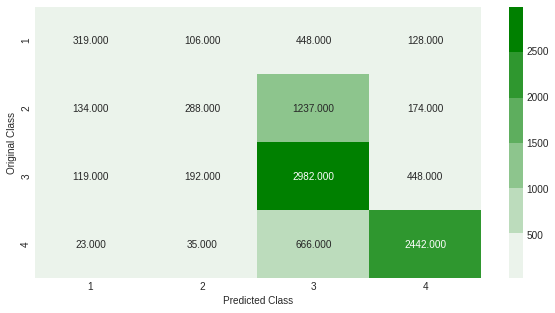

-------------------------------------------------- Precision matrix --------------------------------------------------


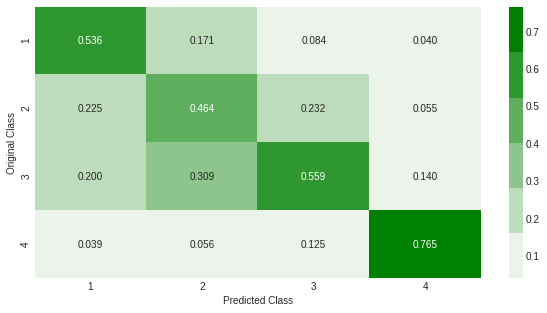

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


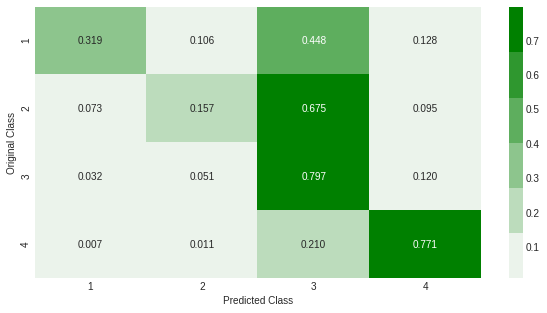

Sum of rows in precision matrix [1. 1. 1. 1.]


In [152]:
x_cfl=LGBMClassifier(n_estimators=500, learning_rate=0.03, colsample_bytree=0.9, max_depth=10,subsample=1,nthread=-1
                    )
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)
predict_y = c_cfl.predict_proba(X_train)
print ('\nFor values of best params train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('\nFor values of best params cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('\nFor values of best params test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

In [153]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model", "Eval Metric","Train Loss","CV Loss","Test Loss","% Misclassified"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["selected features+ 5 pca",  "LGBM","LOG LOSS",0.72,0.92,0.93,38.8])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])

print(x)

+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
|        Feature Set        |       Model        | Eval Metric | Train Loss | CV Loss | Test Loss | % Misclassified |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
|  selected features+ 5 pca |        LGBM        |   LOG LOSS  |    0.72    |   0.92  |    0.93   |       38.8      |
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+


<Figure size 720x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 25 artists>

([<matplotlib.axis.YTick at 0x7f6c56a30810>,
 [Text(0, 0, 'year_quarter_202001-Q1'),
  Text(0, 0, 'year_quarter_202002-Q2'),
  Text(0, 0, 'physician_in_group_practice'),
  Text(0, 0, 'physician_speciality_other'),
  Text(0, 0, 'year_quarter_201904-Q4'),
  Text(0, 0, 'year_quarter_201903-Q3'),
  Text(0, 0, 'physician_speciality_nephrology'),
  Text(0, 0, 'physician_hospital_affiliation'),
  Text(0, 0, 'physician_gender_F'),
  Text(0, 0, 'brand_prescribed'),
  Text(0, 0, 'year_quarter_202003-Q3'),
  Text(0, 0, 'new_prescriptions'),
  Text(0, 0, 'total_sample_dropped'),
  Text(0, 0, 'PCA_1'),
  Text(0, 0, 'total_competitor_prescription'),
  Text(0, 0, 'PCA_4'),
  Text(0, 0, 'PCA_2'),
  Text(0, 0, 'total_patient_with_medicaid_insurance_plan'),
  Text(0, 0, 'total_representative_visits'),
  Text(0, 0, 'PCA_3'),
  Text(0, 0, 'total_patient_with_medicare_insurance_plan'),
  Text(0, 0, 'total_prescriptions_for_indication2'),
  Text(0, 0, 'total_prescriptions_for_indication1'),
  Text(0, 0, 'to

Text(0.5, 0, 'Relative Importance')

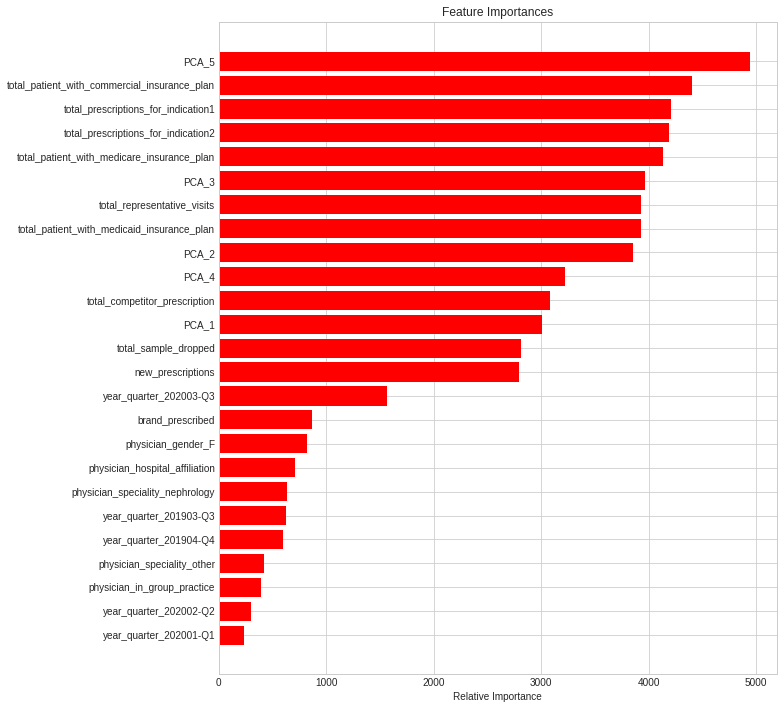

In [154]:
features = X_train.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# SET 6 Dataset : Selected Feature + 10 AE components

In [178]:
all_data_new_ae=pd.read_csv('/content/Drug_Marketing1/Drug_Marketing1/all_data_new.csv')

In [179]:
CLASS_LABEL ='physician_segment_ordinal'

In [180]:
print(f'\nTotal Dataset contains {all_data_new_ae.shape[0]} samples and {all_data_new_ae.shape[1]} variables')
features = [c for c in all_data_new_ae.columns if c not in [CLASS_LABEL]]
print(f'\nThe dataset contains {len(features)} features and 1 CLASS LABEL')


Total Dataset contains 48703 samples and 31 variables

The dataset contains 30 features and 1 CLASS LABEL


In [181]:
category_cols= ['physician_gender', 'physician_speciality', 'year_quarter']

In [182]:
all_data_new_ae.drop(['saving_cards_dropped','vouchers_dropped','total_seminar_as_attendee','total_seminar_as_speaker'
,'total_prescriptions_for_indication3','brand_web_impressions','brand_ehr_impressions','brand_enews_impressions','brand_mobile_impressions'
,'brand_organic_web_visits','brand_paidsearch_visits','urban_population_perc_in_physician_locality','percent_population_with_health_insurance_in_last10q'
,'physician_tenure','physician_age'], axis = 1,inplace = True)

In [186]:
all_data_new_ae.head(5)

,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_segment_ordinal,physician_gender_F,physician_gender_M,physician_speciality_nephrology,physician_speciality_other,physician_speciality_urology,year_quarter_201903-Q3,year_quarter_201904-Q4,year_quarter_202001-Q1,year_quarter_202002-Q2,year_quarter_202003-Q3
0,1,9,39,0,1,46,20,28,76,28,165,42,3,0,1,1,0,0,1,0,0,0,0
1,1,4,12,0,1,43,18,22,72,36,169,45,3,0,1,1,0,0,0,1,0,0,0
2,1,14,26,0,1,53,17,33,80,33,198,49,3,0,1,1,0,0,0,0,1,0,0
3,1,18,20,0,1,45,19,38,67,28,170,46,3,0,1,1,0,0,0,0,0,1,0
4,1,5,96,0,1,48,25,35,75,31,169,0,2,0,1,1,0,0,0,0,0,0,1


In [190]:
features = [c for c in all_data_new_ae.columns if c not in [CLASS_LABEL]]
features

['brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'total_competitor_prescription',
 'new_prescriptions',
 'physician_gender_F',
 'physician_gender_M',
 'physician_speciality_nephrology',
 'physician_speciality_other',
 'physician_speciality_urology',
 'year_quarter_201903-Q3',
 'year_quarter_201904-Q4',
 'year_quarter_202001-Q1',
 'year_quarter_202002-Q2',
 'year_quarter_202003-Q3']

In [185]:
all_data_new_ae = pd.get_dummies(all_data_new_ae, columns = category_cols)

In [187]:
y_class = all_data_new_ae[CLASS_LABEL]
CLASS_LABEL ='physician_segment_ordinal'
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(all_data_new_ae.drop(['physician_segment_ordinal'], axis=1), y_class,stratify=y_class,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [188]:
features

['year_quarter',
 'brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'total_competitor_prescription',
 'new_prescriptions',
 'physician_gender',
 'physician_speciality']

In [191]:
numerical_cols=['total_representative_visits',
 'total_sample_dropped',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'total_competitor_prescription',
 'new_prescriptions']

In [192]:
features = numerical_cols
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
X_train[features] = autoscaler.fit_transform(X_train[features])

In [193]:
X_cv[features] = autoscaler.transform(X_cv[features])
X_test[features] = autoscaler.transform(X_test[features])

In [194]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 31169
Number of data points in test data: 9741
Number of data points in cross validation data: 7793


In [197]:
X_train.head(5)

,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_gender_F,physician_gender_M,physician_speciality_nephrology,physician_speciality_other,physician_speciality_urology,year_quarter_201903-Q3,year_quarter_201904-Q4,year_quarter_202001-Q1,year_quarter_202002-Q2,year_quarter_202003-Q3
34847,1,0.072727,0.010776,0,1,0.057664,0.011681,0.087112,0.018753,0.001703,0.050596,0.018734,0,1,1,0,0,0,1,0,0,0
28273,1,0.363636,0.002874,0,0,0.014293,0.006675,0.008660,0.006743,0.000851,0.014407,0.006069,1,0,1,0,0,0,1,0,0,0
38835,1,0.054545,0.000000,0,1,0.036471,0.019191,0.008151,0.032448,0.049808,0.042201,0.025330,1,0,1,0,0,0,0,0,0,1
46417,0,0.109091,0.002155,0,1,0.031050,0.020442,0.019358,0.028234,0.000000,0.021894,0.001319,1,0,0,1,0,0,1,0,0,0
18501,0,0.181818,0.000000,0,1,0.161656,0.062161,0.062659,0.088074,0.027671,0.153148,0.056992,0,1,0,1,0,1,0,0,0,0


Adding Auto-encoder features

In [195]:
X_train.shape[1]

22

no_of_inputs: 22


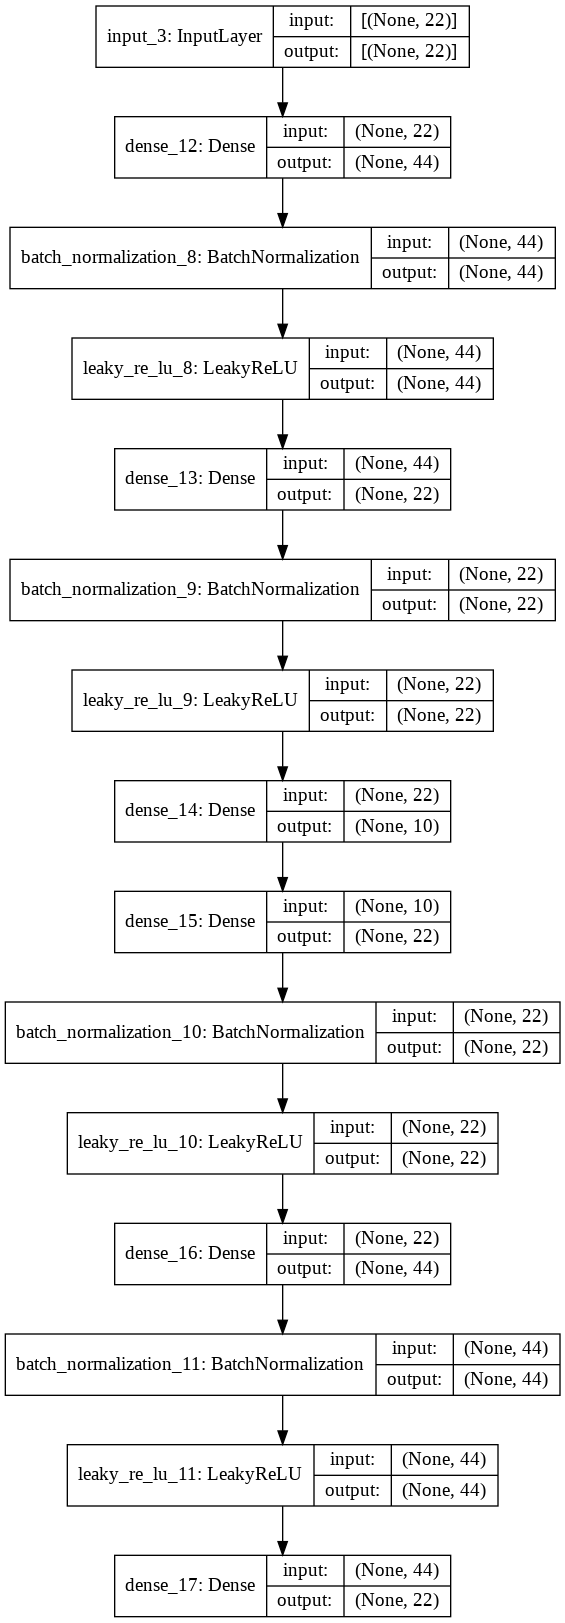

In [196]:
# Reference: https://machinelearningmastery.com/autoencoder-for-classification/
# number of input columns
no_of_inputs = X_train.shape[1]
print('no_of_inputs:',no_of_inputs)
# defining autoencoder
input_features = Input(shape=(no_of_inputs,))
# level 1 encoder
ae = Dense(no_of_inputs*2)(input_features)
ae = BatchNormalization()(ae)
ae = LeakyReLU()(ae)
# level 2 encoder
ae = Dense(no_of_inputs)(ae)
ae = BatchNormalization()(ae)
ae = LeakyReLU()(ae)
# bottleneck features
bottleneck_features = 10
bottleneck_features = Dense(bottleneck_features)(ae)
# level 1 decoder
de = Dense(no_of_inputs)(bottleneck_features)
de = BatchNormalization()(de)
de = LeakyReLU()(de)
# level 2 decoder
de = Dense(no_of_inputs*2)(de)
de = BatchNormalization()(de)
de = LeakyReLU()(de)
# output layer
output_features = Dense(no_of_inputs, activation='linear')(de)
# defining autoencoder model
model = Model(inputs=input_features, outputs=output_features)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)

In [198]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=75, batch_size=16, verbose=2, validation_data=(X_cv,X_cv))


Epoch 1/75
1949/1949 - 5s - loss: 0.0393 - val_loss: 0.0074
Epoch 2/75
1949/1949 - 4s - loss: 0.0143 - val_loss: 0.0037
Epoch 3/75
1949/1949 - 4s - loss: 0.0112 - val_loss: 0.0027
Epoch 4/75
1949/1949 - 3s - loss: 0.0094 - val_loss: 0.0023
Epoch 5/75
1949/1949 - 4s - loss: 0.0081 - val_loss: 0.0022
Epoch 6/75
1949/1949 - 4s - loss: 0.0069 - val_loss: 0.0016
Epoch 7/75
1949/1949 - 3s - loss: 0.0058 - val_loss: 0.0017
Epoch 8/75
1949/1949 - 4s - loss: 0.0052 - val_loss: 0.0014
Epoch 9/75
1949/1949 - 4s - loss: 0.0047 - val_loss: 0.0012
Epoch 10/75
1949/1949 - 4s - loss: 0.0043 - val_loss: 0.0011
Epoch 11/75
1949/1949 - 3s - loss: 0.0039 - val_loss: 0.0014
Epoch 12/75
1949/1949 - 4s - loss: 0.0037 - val_loss: 0.0012
Epoch 13/75
1949/1949 - 4s - loss: 0.0032 - val_loss: 0.0011
Epoch 14/75
1949/1949 - 4s - loss: 0.0031 - val_loss: 0.0011
Epoch 15/75
1949/1949 - 4s - loss: 0.0029 - val_loss: 0.0013
Epoch 16/75
1949/1949 - 4s - loss: 0.0026 - val_loss: 0.0010
Epoch 17/75
1949/1949 - 4s - loss

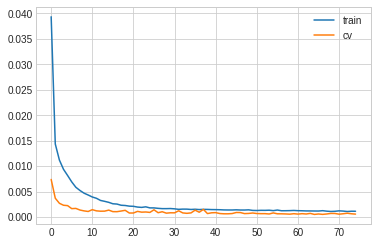

In [199]:
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='cv')
plt.legend()
plt.show()

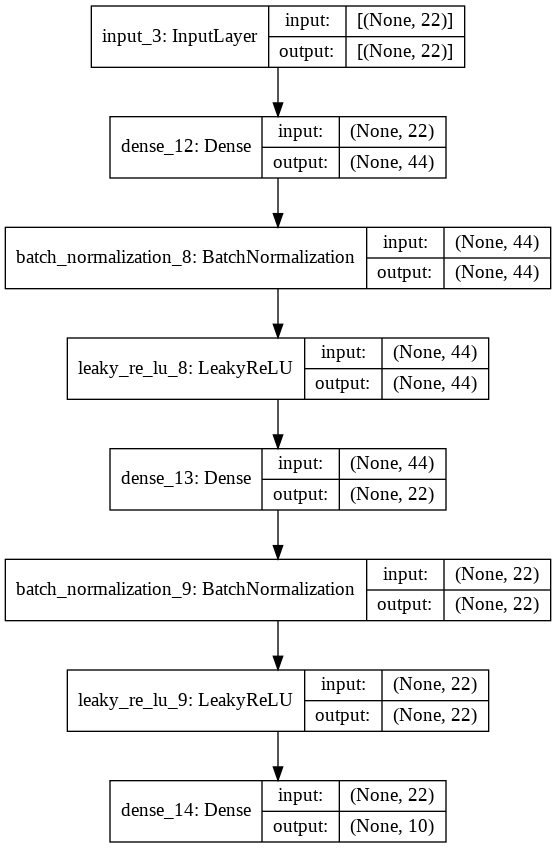

In [200]:
# define an encoder model only for feature engg.
encoder_features_new = Model(inputs=input_features, outputs=bottleneck_features)
plot_model(encoder_features_new, 'encoder_features_new.png', show_shapes=True)
# save the encoder to file
encoder_features_new.save('encoder_features_new.h5')

In [201]:
# load the model from file
encoder_features_new = load_model('/content/Drug_Marketing1/Drug_Marketing1/encoder_features_new.h5',compile=False)

In [202]:
# encodeing the train data
X_train_encode = encoder_features_new.predict(X_train)
# encoding the CV data
X_cv_encode = encoder_features_new.predict(X_cv)
# encoding the Test data
X_test_encode = encoder_features_new.predict(X_test)

In [203]:
X_train_encode.shape
X_cv_encode.shape
X_test_encode.shape

(31169, 10)

(7793, 10)

(9741, 10)

In [204]:
# Reference : https://stackoverflow.com/questions/49277682/python-pandas-concat-vertical-and-horizontal

X_train_ae = pd.DataFrame(data=X_train_encode, columns=("AE_1", "AE_2", "AE_3","AE_4", "AE_5", "AE_6","AE_7", "AE_8", "AE_9","AE_10"))

In [205]:
X_train_ae.head(5)

,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10
0,0.854095,0.554689,-1.899097,1.522358,0.103974,1.738790,-0.226016,-0.961202,0.083552,2.088509
1,-1.784315,-2.411825,-3.205446,2.267019,-1.021091,2.725899,-1.246075,0.042979,-0.324089,0.317148
2,0.035975,-2.918171,-0.149172,0.810631,0.809868,-0.997231,-3.666248,-1.312613,-0.794508,0.797029
3,-3.880074,-1.811524,1.150522,0.745497,-1.648494,-1.789059,-1.362487,-5.818489,-0.852765,-1.105705
4,-0.779437,0.250275,-0.417470,0.408568,-2.976859,-0.294793,3.461958,-4.386781,1.095211,-1.501072


In [206]:
X_cv_ae = pd.DataFrame(data=X_cv_encode, columns=("AE_1", "AE_2", "AE_3","AE_4", "AE_5", "AE_6","AE_7", "AE_8", "AE_9","AE_10"))
X_test_ae = pd.DataFrame(data=X_test_encode, columns=("AE_1", "AE_2", "AE_3","AE_4", "AE_5", "AE_6","AE_7", "AE_8", "AE_9","AE_10"))

In [207]:
X_train.index = X_train_ae.index
X_train = pd.concat([X_train, X_train_ae], axis= 1)

In [209]:
X_cv.index = X_cv_ae.index
X_cv = pd.concat([X_cv, X_cv_ae], axis= 1)
X_test.index = X_test_ae.index
X_test = pd.concat([X_test, X_test_ae], axis= 1)

In [214]:
X_train.head(5)

,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_gender_F,physician_gender_M,physician_speciality_nephrology,physician_speciality_other,physician_speciality_urology,year_quarter_201903-Q3,year_quarter_201904-Q4,year_quarter_202001-Q1,year_quarter_202002-Q2,year_quarter_202003-Q3,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10
0,1,0.072727,0.010776,0,1,0.057664,0.011681,0.087112,0.018753,0.001703,0.050596,0.018734,0,1,1,0,0,0,1,0,0,0,0.854095,0.554689,-1.899097,1.522358,0.103974,1.738790,-0.226016,-0.961202,0.083552,2.088509
1,1,0.363636,0.002874,0,0,0.014293,0.006675,0.008660,0.006743,0.000851,0.014407,0.006069,1,0,1,0,0,0,1,0,0,0,-1.784315,-2.411825,-3.205446,2.267019,-1.021091,2.725899,-1.246075,0.042979,-0.324089,0.317148
2,1,0.054545,0.000000,0,1,0.036471,0.019191,0.008151,0.032448,0.049808,0.042201,0.025330,1,0,1,0,0,0,0,0,0,1,0.035975,-2.918171,-0.149172,0.810631,0.809868,-0.997231,-3.666248,-1.312613,-0.794508,0.797029
3,0,0.109091,0.002155,0,1,0.031050,0.020442,0.019358,0.028234,0.000000,0.021894,0.001319,1,0,0,1,0,0,1,0,0,0,-3.880074,-1.811524,1.150522,0.745497,-1.648494,-1.789059,-1.362487,-5.818489,-0.852765,-1.105705
4,0,0.181818,0.000000,0,1,0.161656,0.062161,0.062659,0.088074,0.027671,0.153148,0.056992,0,1,0,1,0,1,0,0,0,0,-0.779437,0.250275,-0.417470,0.408568,-2.976859,-0.294793,3.461958,-4.386781,1.095211,-1.501072


In [219]:
X_cv.head(5)

,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_gender_F,physician_gender_M,physician_speciality_nephrology,physician_speciality_other,physician_speciality_urology,year_quarter_201903-Q3,year_quarter_201904-Q4,year_quarter_202001-Q1,year_quarter_202002-Q2,year_quarter_202003-Q3,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10
0,1,0.181818,0.002874,0,1,0.043864,0.005841,0.061640,0.007375,0.002554,0.028361,0.015040,0,1,1,0,0,0,0,0,1,0,2.137945,-1.281832,-1.600087,-0.635671,-0.449385,0.524601,1.906693,0.974811,-1.433441,0.008207
1,1,0.127273,0.026580,0,1,0.090685,0.025031,0.103413,0.044458,0.011494,0.063074,0.030607,1,0,1,0,0,0,0,0,1,0,0.585964,-3.626864,-1.942138,0.245065,-1.105144,-0.752824,-0.188999,0.908626,-1.482534,-1.397730
2,1,0.072727,0.000000,0,1,0.023657,0.012516,0.017320,0.022335,0.000000,0.022689,0.007916,0,1,0,1,0,0,0,0,1,0,1.123726,-1.491214,0.797775,-1.394075,-2.108911,1.114861,3.397009,-4.182796,-0.830941,-3.144516
3,1,0.218182,0.000000,0,1,0.074421,0.064247,0.006623,0.047198,0.138357,0.087691,0.059103,0,1,1,0,0,0,0,1,0,0,1.707216,-1.232041,0.361217,1.094600,-1.060657,1.673844,1.073552,1.315220,0.395560,1.861682
4,1,0.200000,0.007184,0,1,0.051750,0.011264,0.127356,0.012642,0.006386,0.050028,0.000000,0,1,1,0,0,1,0,0,0,0,1.733999,0.743923,-2.291874,1.497663,-1.824664,0.207427,0.938472,0.488303,0.345010,1.251089


In [220]:

X_test = X_test.iloc[:,:-10]

In [221]:
X_test.head(5)

,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_gender_F,physician_gender_M,physician_speciality_nephrology,physician_speciality_other,physician_speciality_urology,year_quarter_201903-Q3,year_quarter_201904-Q4,year_quarter_202001-Q1,year_quarter_202002-Q2,year_quarter_202003-Q3,AE_1,AE_2,AE_3,AE_4,AE_5,AE_6,AE_7,AE_8,AE_9,AE_10
0,1,0.054545,0.000000,1,1,0.002957,0.002086,0.009170,0.000421,0.000000,0.003517,0.001583,0,1,1,0,0,0,0,0,1,0,3.385129,-1.724733,-1.682489,1.310645,0.507122,0.542916,3.122409,0.866373,-1.115606,0.127174
1,0,0.054545,0.000000,0,1,0.020700,0.005841,0.020377,0.013485,0.000000,0.020533,0.000264,1,0,1,0,0,0,0,0,0,1,-1.119320,-2.976235,-0.404129,0.315959,1.390564,-2.175657,-3.005500,-1.119129,-0.274400,1.022478
2,1,0.127273,0.045977,1,1,0.026121,0.005841,0.020377,0.025917,0.000000,0.029382,0.036675,1,0,0,1,0,0,0,0,0,1,0.078821,-4.020988,0.004572,2.977586,0.539843,1.355521,0.870798,-5.356386,0.243770,-3.554304
3,1,0.218182,0.001437,0,1,0.023164,0.002920,0.003566,0.007796,0.000851,0.025525,0.001055,1,0,1,0,0,0,0,1,0,0,-0.149983,-3.361753,0.485992,1.883559,-1.536961,-0.314588,-1.864277,1.376001,0.158857,0.201312
4,1,0.072727,0.025862,0,1,0.032035,0.005841,0.082527,0.005057,0.006386,0.034487,0.013456,0,1,0,1,0,0,0,0,0,1,1.160053,-1.020146,0.682145,-0.567936,-0.014638,2.210875,1.554611,-5.763105,0.526244,-1.729469


- LGBM Classifier

In [210]:
x_cfl=LGBMClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.5,0.7,0.9,1],
    'subsample':[0.5,0.7,0.9,1],
    'objective': 'multiclass',
    'eval_metric':'multi_logloss'
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.9min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, s...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 

In [211]:
random_cfl1_results=pd.DataFrame(random_cfl1.cv_results_)
random_cfl1_results=random_cfl1_results[['params','mean_test_score','rank_test_score']]
random_cfl1_results

,params,mean_test_score,rank_test_score
0,"{'subsample': 0.9, 'objective': 't', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.05, 'eval_metric': 'i', 'colsample_bytree': 0.7}",0.606243,6
1,"{'subsample': 1, 'objective': 'c', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'eval_metric': 'g', 'colsample_bytree': 0.5}",0.612949,1
2,"{'subsample': 0.9, 'objective': 's', 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.1, 'eval_metric': 't', 'colsample_bytree': 0.5}",0.593827,10
3,"{'subsample': 0.7, 'objective': 'l', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'eval_metric': 'o', 'colsample_bytree': 0.5}",0.607944,4
4,"{'subsample': 0.5, 'objective': 's', 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'eval_metric': 'u', 'colsample_bytree': 0.9}",0.606917,5
5,"{'subsample': 0.5, 'objective': 'm', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.15, 'eval_metric': 'g', 'colsample_bytree': 1}",0.598640,9
6,"{'subsample': 0.5, 'objective': 's', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'eval_metric': 'o', 'colsample_bytree': 1}",0.609837,3
7,"{'subsample': 0.7, 'objective': 'l', 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'eval_metric': 's', 'colsample_bytree': 0.5}",0.600180,7
8,"{'subsample': 0.9, 'objective': 'u', 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'eval_metric': 's', 'colsample_bytree': 0.5}",0.612628,2
9,"{'subsample': 0.5, 'objective': 'a', 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'eval_metric': 'i', 'colsample_bytree': 0.7}",0.599538,8


In [212]:
print(random_cfl1.best_score_)
print(random_cfl1.best_params_)

0.6129489973394942
{'subsample': 1, 'objective': 'c', 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'eval_metric': 'g', 'colsample_bytree': 0.5}


In [ ]:
x_cfl=LGBMClassifier(n_estimators=500, learning_rate=0.01, colsample_bytree=0.5, max_depth=10,subsample=1,nthread=-1
                    )
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('\nFor values of best params train loss',log_loss(y_train, predict_y))




For values of best params cv loss 0.9466748617460997

For values of best params test loss 0.9417478843145178
Number of misclassified points  38.16856585566163
-------------------------------------------------- Confusion matrix --------------------------------------------------


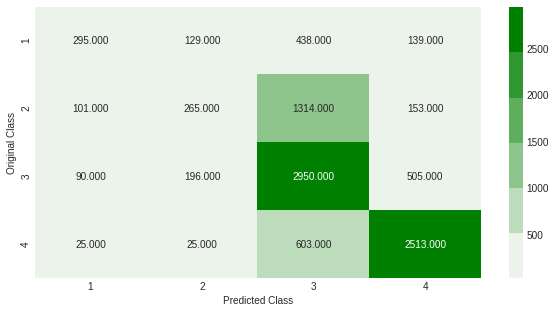

-------------------------------------------------- Precision matrix --------------------------------------------------


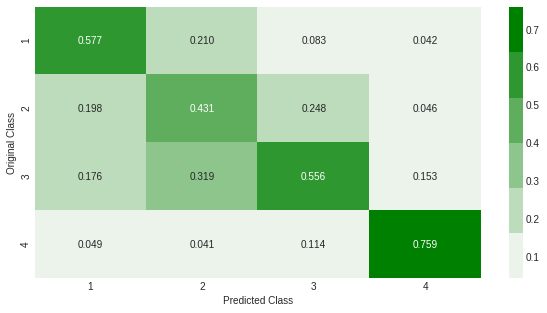

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


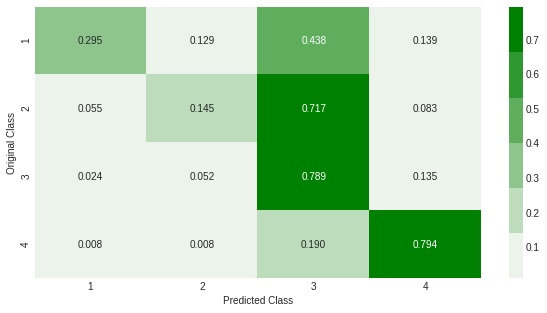

Sum of rows in precision matrix [1. 1. 1. 1.]


In [222]:
predict_y = c_cfl.predict_proba(X_cv)
print ('\nFor values of best params cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('\nFor values of best params test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

In [223]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model", "Eval Metric","Train Loss","CV Loss","Test Loss","% Misclassified"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["selected features+ 10 AE",  "LGBM","LOG LOSS",0.87,0.94,0.94,38.8])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])

print(x)

+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
|        Feature Set        |       Model        | Eval Metric | Train Loss | CV Loss | Test Loss | % Misclassified |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
|  selected features+ 10 AE |        LGBM        |   LOG LOSS  |    0.87    |   0.94  |    0.94   |       38.8      |
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+


<Figure size 720x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 25 artists>

([<matplotlib.axis.YTick at 0x7f6c550ee1d0>,
 [Text(0, 0, 'year_quarter_201903-Q3'),
  Text(0, 0, 'physician_in_group_practice'),
  Text(0, 0, 'year_quarter_201904-Q4'),
  Text(0, 0, 'physician_hospital_affiliation'),
  Text(0, 0, 'brand_prescribed'),
  Text(0, 0, 'year_quarter_202003-Q3'),
  Text(0, 0, 'AE_6'),
  Text(0, 0, 'AE_10'),
  Text(0, 0, 'AE_7'),
  Text(0, 0, 'new_prescriptions'),
  Text(0, 0, 'AE_9'),
  Text(0, 0, 'AE_3'),
  Text(0, 0, 'AE_8'),
  Text(0, 0, 'total_sample_dropped'),
  Text(0, 0, 'AE_1'),
  Text(0, 0, 'AE_4'),
  Text(0, 0, 'AE_5'),
  Text(0, 0, 'AE_2'),
  Text(0, 0, 'total_representative_visits'),
  Text(0, 0, 'total_patient_with_medicaid_insurance_plan'),
  Text(0, 0, 'total_patient_with_medicare_insurance_plan'),
  Text(0, 0, 'total_prescriptions_for_indication2'),
  Text(0, 0, 'total_prescriptions_for_indication1'),
  Text(0, 0, 'total_competitor_prescription'),
  Text(0, 0, 'total_patient_with_commercial_insurance_plan')])

Text(0.5, 0, 'Relative Importance')

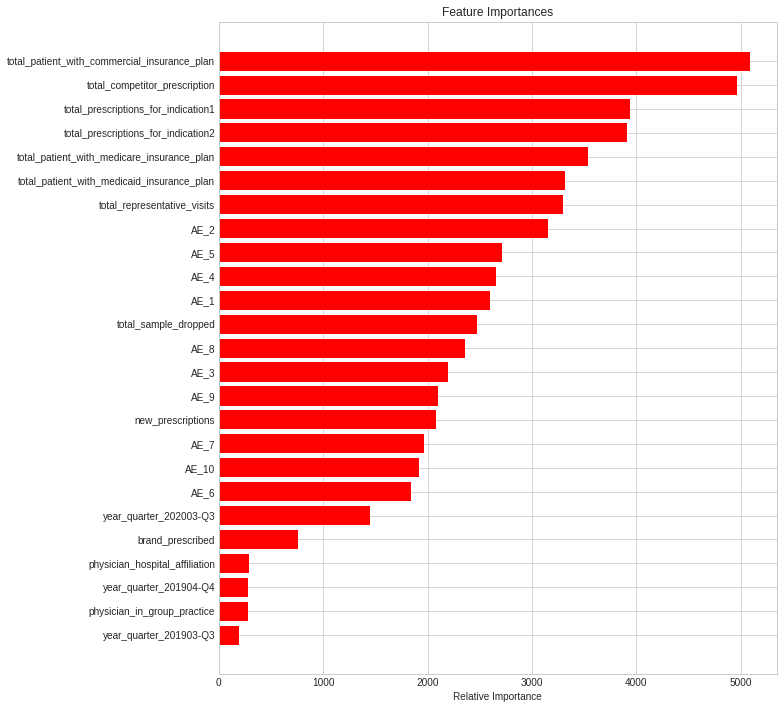

In [224]:
features = X_train.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# FINAL SUMMARY FOR ALL ALGOS AND METRICS

In [246]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model", "Eval Metric","Train Loss","CV Loss","Test Loss","% Misclassified"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["Basic",  "Random","LOG LOSS",'',1.67,1.65,75.3])
x.add_row(["Basic",  "KNN","LOG LOSS",1.07,1.15,1.15,50.3])
x.add_row(["Basic",  "SGD-LR","LOG LOSS",1.01,1.01,1.01,42.1])
x.add_row(["Basic",  "SGD-SVM","LOG LOSS",1.02,1.02,1.02,41.1])
x.add_row(["-------------------------",  "------------------","----","----","----","----","----"])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["Basic",  "RF","LOG LOSS",0.79,0.92,0.92,37.6])
x.add_row(["Basic",  "RF","F1-macro",0.78,0.57,0.55,36])
x.add_row(["Basic",  "RF","F1-micro",0.66,0.61,0.61,38.3])
x.add_row(["--------*******----------",  "------*******-----","****","****","****","****","****"])
x.add_row(["Basic",  "LGBM","LOG LOSS",0.32,0.81,0.81,30])
x.add_row(["--------*******----------",  "------*******-----","****","****","****","****","****"])
x.add_row(["Basic",  "LGBM","F1-macro",0.78,0.57,0.55,36])
x.add_row(["Basic",  "LGBM","F1-micro",0.98,0.68,0.67,32.3])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["Basic+AE",  "LGBM","LOG LOSS",0.37,0.89,0.91,35.8])
x.add_row(["Basic+AE",  "LGBM","F1-Macro",0.99,0.56,0.56,34.9])
x.add_row(["Basic+AE",  "LGBM","F1-Micro",0.97,0.65,0.64,35.6])
x.add_row(["Basic+AE",  "LR","LOG LOSS",1.03,1.02,1.03,43.1])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["Basic+pca",  "LGBM","LOG LOSS",0.35,0.87,0.87,33.9])
x.add_row(["Basic+pca",  "LR","LOG LOSS",1.01,1.02,1.01,42.4])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["selected features",  "LGBM","LOG LOSS",0.85,0.94,0.94,38.4])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["selected features+ 5 pca",  "LGBM","LOG LOSS",0.72,0.92,0.93,38.8])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["selected features+ 10 AE",  "LGBM","LOG LOSS",0.87,0.94,0.94,38.8])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])

print(x)

+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
|        Feature Set        |       Model        | Eval Metric | Train Loss | CV Loss | Test Loss | % Misclassified |
+---------------------------+--------------------+-------------+------------+---------+-----------+-----------------+
| ------------------------- | ------------------ |     ----    |    ----    |   ----  |    ----   |       ----      |
|           Basic           |       Random       |   LOG LOSS  |            |   1.67  |    1.65   |       75.3      |
|           Basic           |        KNN         |   LOG LOSS  |    1.07    |   1.15  |    1.15   |       50.3      |
|           Basic           |       SGD-LR       |   LOG LOSS  |    1.01    |   1.01  |    1.01   |       42.1      |
|           Basic           |      SGD-SVM       |   LOG LOSS  |    1.02    |   1.02  |    1.02   |       41.1      |
| ------------------------- | ------------------ |     -

# INFERENCES FROM CONFUSION MATRIX OF THE MODEL LGBM (WITH LOG LOSS) AS THAT WAS THE BEST ONE

**1. We know that Class 3 and Class 4 constitute 70% of data.**

**2. From the Confusion matrix we see that**

- For the original class 3, 3012 point were correctly predicted as class 3, 397 as class 4, 262 as class 2, 70 as class 1
  
- For the original class 4, 2579 point were correctly predicted as class 4, 512 as class 3, 57 as class 2, 18 as class 1

- Lets also see ratios for which we have built 2 other matrices

**3. From Precision Matrix we see that**

- Here we are normalizing column matrix to 1 , that is precision matrix (column sum=1)

- Precision for Class 1 : 72.5%, Precision for Class 2 : 62.6%, Precision for Class 3 : 64.6%, Precision for Class 4 : 80%

- If you take the 1st column, 2nd row element which is 0.132 which 13.2%, this shows that even though it is predicted to be class 1, it actually belongs to class 2.

- Similarly if you take 2nd column, 3rd row element which is 0.211, 21.1%, this shows that 21.1% which actually belong to class 3 are predicted to be class 2.

**4. From Recall Matrix see see that.**

- Here are normalizing row matrix to 1 , that is Recall matrix (Row sum =1 )

- Recall means, how well my model is able to recall the actual class label.

- Of all the points that originally belong to class 1 only 44.6% of points were actually predicted as class 1, 14.5% of points were predicted as class 2, etc.

- Lets take off diagonal elements for class 3
- Lets take 3rd column, 2nd row, which is 0.45 which is 45%, which states that of all the points belonging to class 2, 45% of points were predicted to be class 3 , 8.1% of points were declared by model as class 4, 4.4% of points were declared by model as class 1.
